# Análisis Exploratorio de Datos (EDA) Completo
## Presa Abelardo L. Rodríguez - Hermosillo, Sonora

**Objetivo:** Realizar un análisis exploratorio exhaustivo de los datos hidrológicos y meteorológicos de la Presa Abelardo L. Rodríguez para comprender patrones, tendencias y relaciones que fundamenten el análisis del rol hidrológico y biológico del embalse.

**Datasets analizados:**
- Datos de almacenamiento de la presa (1947-2024)
- Datos meteorológicos completos (1940-2024)
- Datos fusionados (hidrometeorológicos)

---

## 1. Configuración del Entorno

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, mannwhitneyu, spearmanr, pearsonr
import warnings
from datetime import datetime

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings('ignore')

print("✅ Librerías cargadas exitosamente")
print(f"Fecha de análisis: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Librerías cargadas exitosamente
Fecha de análisis: 2025-11-08 12:27:47


## 2. Carga de Datos

In [2]:
# Cargar datasets
df_presa = pd.read_csv('../data/raw/df_arlso.csv')
df_meteo = pd.read_csv('../data/raw/meteo_data_full.csv')

# Convertir fechas
df_presa['fecha'] = pd.to_datetime(df_presa['fecha'])
df_meteo['time'] = pd.to_datetime(df_meteo['time'])

print("📊 DATASETS CARGADOS")
print("=" * 60)
print(f"Dataset Presa: {df_presa.shape[0]:,} registros × {df_presa.shape[1]} columnas")
print(f"  └─ Rango temporal: {df_presa['fecha'].min().date()} a {df_presa['fecha'].max().date()}")
print(f"\nDataset Meteorológico: {df_meteo.shape[0]:,} registros × {df_meteo.shape[1]} columnas")
print(f"  └─ Rango temporal: {df_meteo['time'].min().date()} a {df_meteo['time'].max().date()}")

📊 DATASETS CARGADOS
Dataset Presa: 24,631 registros × 3 columnas
  └─ Rango temporal: 1947-04-14 a 2024-09-19

Dataset Meteorológico: 31,047 registros × 17 columnas
  └─ Rango temporal: 1940-01-01 a 2024-12-31


## 3. Exploración Inicial
### 3.1 Dataset de la Presa

In [3]:
print("📋 INFORMACIÓN DEL DATASET - PRESA ARLSO")
print("=" * 60)
print("\n1. Estructura del dataset:")
print(df_presa.info())

print("\n2. Primeras filas:")
display(df_presa.head(10))

print("\n3. Últimas filas:")
display(df_presa.tail(10))

📋 INFORMACIÓN DEL DATASET - PRESA ARLSO

1. Estructura del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24631 entries, 0 to 24630
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   clave               24631 non-null  object        
 1   fecha               24631 non-null  datetime64[ns]
 2   almacenamiento_hm3  24631 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 577.4+ KB
None

2. Primeras filas:


clave      fecha  almacenamiento_hm3
0  ARLSO 1947-04-14                0.09
1  ARLSO 1947-04-15                0.11
2  ARLSO 1947-04-16                0.11
3  ARLSO 1947-04-17                0.12
4  ARLSO 1947-04-18                0.12
5  ARLSO 1947-04-19                0.13
6  ARLSO 1947-04-20                0.14
7  ARLSO 1947-04-21                0.14
8  ARLSO 1947-04-22                0.15
9  ARLSO 1947-04-23                0.15


3. Últimas filas:


clave      fecha  almacenamiento_hm3
24621  ARLSO 2024-09-10                 0.0
24622  ARLSO 2024-09-11                 0.0
24623  ARLSO 2024-09-12                 0.0
24624  ARLSO 2024-09-13                 0.0
24625  ARLSO 2024-09-14                 0.0
24626  ARLSO 2024-09-15                 0.0
24627  ARLSO 2024-09-16                 0.0
24628  ARLSO 2024-09-17                 0.0
24629  ARLSO 2024-09-18                 0.0
24630  ARLSO 2024-09-19                 0.0

In [4]:
print("📊 ESTADÍSTICAS DESCRIPTIVAS - ALMACENAMIENTO")
print("=" * 60)
stats_presa = df_presa['almacenamiento_hm3'].describe()
print(stats_presa)

# Estadísticas adicionales
print("\n📈 Estadísticas adicionales:")
print(f"  • Rango: {df_presa['almacenamiento_hm3'].max() - df_presa['almacenamiento_hm3'].min():.2f} hm³")
print(f"  • Coef. de variación: {(df_presa['almacenamiento_hm3'].std() / df_presa['almacenamiento_hm3'].mean() * 100):.2f}%")
print(f"  • Asimetría (skewness): {df_presa['almacenamiento_hm3'].skew():.2f}")
print(f"  • Curtosis: {df_presa['almacenamiento_hm3'].kurtosis():.2f}")
print(f"  • Días con almacenamiento = 0: {(df_presa['almacenamiento_hm3'] == 0).sum():,} ({(df_presa['almacenamiento_hm3'] == 0).sum() / len(df_presa) * 100:.2f}%)")
print(f"  • Días con almacenamiento < 1 hm³: {(df_presa['almacenamiento_hm3'] < 1).sum():,} ({(df_presa['almacenamiento_hm3'] < 1).sum() / len(df_presa) * 100:.2f}%)")
print(f"  • Días con almacenamiento > 200 hm³: {(df_presa['almacenamiento_hm3'] > 200).sum():,} ({(df_presa['almacenamiento_hm3'] > 200).sum() / len(df_presa) * 100:.2f}%)")

📊 ESTADÍSTICAS DESCRIPTIVAS - ALMACENAMIENTO
count    24631.000000
mean        64.447475
std         69.911783
min          0.000000
25%          1.275000
50%         42.890000
75%        110.115000
max        300.320000
Name: almacenamiento_hm3, dtype: float64

📈 Estadísticas adicionales:
  • Rango: 300.32 hm³
  • Coef. de variación: 108.48%
  • Asimetría (skewness): 1.01
  • Curtosis: 0.18
  • Días con almacenamiento = 0: 1,894 (7.69%)
  • Días con almacenamiento < 1 hm³: 5,749 (23.34%)
  • Días con almacenamiento > 200 hm³: 1,403 (5.70%)


### 3.2 Dataset Meteorológico

In [5]:
print("📋 INFORMACIÓN DEL DATASET - METEOROLÓGICO")
print("=" * 60)
print("\n1. Estructura del dataset:")
print(df_meteo.info())

print("\n2. Primeras filas:")
display(df_meteo.head())

print("\n3. Valores faltantes:")
missing = df_meteo.isnull().sum()
missing_pct = (missing / len(df_meteo)) * 100
missing_df = pd.DataFrame({
    'Valores faltantes': missing,
    'Porcentaje (%)': missing_pct
}).sort_values('Valores faltantes', ascending=False)
display(missing_df[missing_df['Valores faltantes'] > 0])

📋 INFORMACIÓN DEL DATASET - METEOROLÓGICO

1. Estructura del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   time                            31047 non-null  datetime64[ns]
 1   precipitation_sum               31047 non-null  float64       
 2   rain_sum                        31047 non-null  float64       
 3   et0_fao_evapotranspiration      31047 non-null  float64       
 4   temperature_2m_mean             31047 non-null  float64       
 5   temperature_2m_max              31047 non-null  float64       
 6   precipitation_hours             31047 non-null  float64       
 7   wind_speed_10m_max              31047 non-null  float64       
 8   wind_speed_10m_mean             31047 non-null  float64       
 9   vapour_pressure_deficit_max     31047 non-null  float64       
 10  

time  precipitation_sum  rain_sum  et0_fao_evapotranspiration  \
0 1940-01-01                0.0       0.0                        3.19   
1 1940-01-02                0.0       0.0                        2.86   
2 1940-01-03                0.0       0.0                        3.68   
3 1940-01-04                0.0       0.0                        2.75   
4 1940-01-05                0.1       0.1                        2.19   

   temperature_2m_mean  temperature_2m_max  precipitation_hours  \
0                 15.5                23.7                  0.0   
1                 15.5                23.3                  0.0   
2                 17.0                25.5                  0.0   
3                 16.1                22.8                  0.0   
4                 15.1                21.0                  1.0   

   wind_speed_10m_max  wind_speed_10m_mean  vapour_pressure_deficit_max  \
0                11.9                  6.8                         2.33   
1                13.0                  7.2                         2.30   
2                18.2                  9.7                         2.60   
3                13.2                  6.5                         2.00   
4                19.8                 11.3                         1.38   

   shortwave_radiation_sum  relative_humidity_2m_mean  cloud_cover_mean  \
0                    14.54                         42                41   
1                    11.71                         42                77   
2                    14.10                         42                63   
3                    11.94                         52                68   
4                     8.83                         66                78   

   soil_moisture_0_to_100cm_mean  soil_moisture_0_to_7cm_mean  \
0                          0.053                        0.053   
1                          0.053                        0.053   
2                          0.053                        0.052   
3                          0.053                        0.052   
4                          0.053                        0.052   

   soil_moisture_28_to_100cm_mean  soil_moisture_7_to_28cm_mean  
0                           0.051                         0.062  
1                           0.051                         0.061  
2                           0.051                         0.061  
3                           0.051                         0.061  
4                           0.051                         0.061


3. Valores faltantes:


Empty DataFrame
Columns: [Valores faltantes, Porcentaje (%)]
Index: []

In [6]:
print("📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES METEOROLÓGICAS")
print("=" * 60)
display(df_meteo.describe().T.round(2))

📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES METEOROLÓGICAS


count                           mean  \
time                              31047  1982-07-01 23:59:59.999999936   
precipitation_sum               31047.0                       0.565401   
rain_sum                        31047.0                       0.565401   
et0_fao_evapotranspiration      31047.0                       5.747435   
temperature_2m_mean             31047.0                      24.099262   
temperature_2m_max              31047.0                      31.407344   
precipitation_hours             31047.0                       0.824943   
wind_speed_10m_max              31047.0                      16.490936   
wind_speed_10m_mean             31047.0                       9.244223   
vapour_pressure_deficit_max     31047.0                       3.849091   
shortwave_radiation_sum         31047.0                      21.855622   
relative_humidity_2m_mean       31047.0                      41.920862   
cloud_cover_mean                31047.0                      28.397462   
soil_moisture_0_to_100cm_mean   31047.0                       0.138809   
soil_moisture_0_to_7cm_mean     31047.0                       0.060931   
soil_moisture_28_to_100cm_mean  31047.0                       0.145328   
soil_moisture_7_to_28cm_mean    31047.0                       0.142442   

                                                min                  25%  \
time                            1940-01-01 00:00:00  1961-04-01 12:00:00   
precipitation_sum                               0.0                  0.0   
rain_sum                                        0.0                  0.0   
et0_fao_evapotranspiration                     0.39                 4.07   
temperature_2m_mean                             3.6                 18.3   
temperature_2m_max                              8.7                 26.3   
precipitation_hours                             0.0                  0.0   
wind_speed_10m_max                              5.0                 13.2   
wind_speed_10m_mean                             2.5                  7.5   
vapour_pressure_deficit_max                    0.12                 2.58   
shortwave_radiation_sum                        1.24                 16.7   
relative_humidity_2m_mean                       5.0                 28.0   
cloud_cover_mean                                0.0                  1.0   
soil_moisture_0_to_100cm_mean                 0.052                0.127   
soil_moisture_0_to_7cm_mean                     0.0                0.037   
soil_moisture_28_to_100cm_mean                0.047                0.136   
soil_moisture_7_to_28cm_mean                  0.061                0.121   

                                                50%                  75%  \
time                            1982-07-02 00:00:00  2003-10-01 12:00:00   
precipitation_sum                               0.0                  0.0   
rain_sum                                        0.0                  0.0   
et0_fao_evapotranspiration                     5.71                  7.4   
temperature_2m_mean                            24.4                 30.0   
temperature_2m_max                             32.1                 36.9   
precipitation_hours                             0.0                  0.0   
wind_speed_10m_max                             16.3                 19.4   
wind_speed_10m_mean                             8.9                 10.6   
vapour_pressure_deficit_max                    3.72                 5.05   
shortwave_radiation_sum                       22.24                27.02   
relative_humidity_2m_mean                      40.0                 54.0   
cloud_cover_mean                               18.0                 49.0   
soil_moisture_0_to_100cm_mean                 0.135                0.153   
soil_moisture_0_to_7cm_mean                   0.041                0.054   
soil_moisture_28_to_100cm_mean                0.143                0.156   
soil_moisture_7_to_28cm_mean            

## 4. Análisis Univariado
### 4.1 Distribución del Almacenamiento

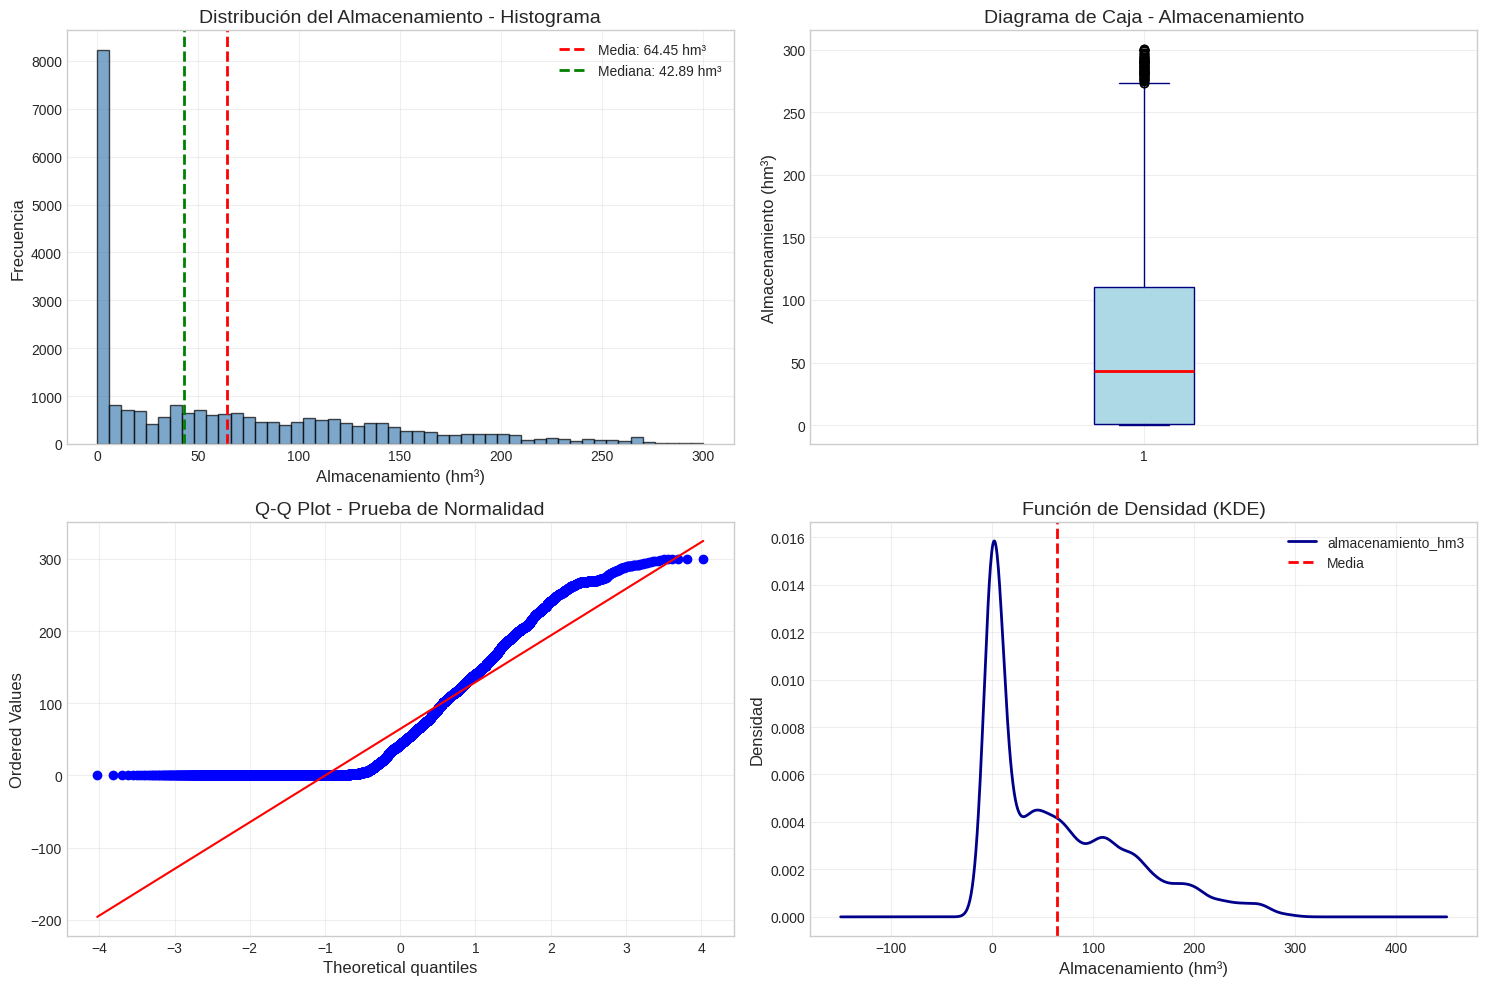


🔬 Prueba de Normalidad (Shapiro-Wilk):
  • Estadístico: 0.8562
  • p-valor: 1.6193e-55
  • ✅ Conclusión: Los datos NO siguen una distribución normal (p < 0.05)


In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma con KDE
axes[0, 0].hist(df_presa['almacenamiento_hm3'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].axvline(df_presa['almacenamiento_hm3'].mean(), color='red', linestyle='--', linewidth=2, label=f"Media: {df_presa['almacenamiento_hm3'].mean():.2f} hm³")
axes[0, 0].axvline(df_presa['almacenamiento_hm3'].median(), color='green', linestyle='--', linewidth=2, label=f"Mediana: {df_presa['almacenamiento_hm3'].median():.2f} hm³")
axes[0, 0].set_xlabel('Almacenamiento (hm³)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución del Almacenamiento - Histograma')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Boxplot
box = axes[0, 1].boxplot(df_presa['almacenamiento_hm3'], vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue', color='navy'),
                         medianprops=dict(color='red', linewidth=2),
                         whiskerprops=dict(color='navy'),
                         capprops=dict(color='navy'))
axes[0, 1].set_ylabel('Almacenamiento (hm³)')
axes[0, 1].set_title('Diagrama de Caja - Almacenamiento')
axes[0, 1].grid(alpha=0.3)

# Q-Q Plot (normalidad)
stats.probplot(df_presa['almacenamiento_hm3'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot - Prueba de Normalidad')
axes[1, 0].grid(alpha=0.3)

# KDE Plot
df_presa['almacenamiento_hm3'].plot(kind='kde', ax=axes[1, 1], color='darkblue', linewidth=2)
axes[1, 1].set_xlabel('Almacenamiento (hm³)')
axes[1, 1].set_ylabel('Densidad')
axes[1, 1].set_title('Función de Densidad (KDE)')
axes[1, 1].axvline(df_presa['almacenamiento_hm3'].mean(), color='red', linestyle='--', linewidth=2, label='Media')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Prueba de normalidad (Shapiro-Wilk)
if len(df_presa) > 5000:
    sample = df_presa['almacenamiento_hm3'].sample(5000, random_state=42)
else:
    sample = df_presa['almacenamiento_hm3']
    
stat, p_value = shapiro(sample)
print(f"\n🔬 Prueba de Normalidad (Shapiro-Wilk):")
print(f"  • Estadístico: {stat:.4f}")
print(f"  • p-valor: {p_value:.4e}")
if p_value < 0.05:
    print("  • ✅ Conclusión: Los datos NO siguen una distribución normal (p < 0.05)")
else:
    print("  • ❌ Conclusión: Los datos siguen una distribución normal (p ≥ 0.05)")

### 4.2 Distribución de Variables Meteorológicas Clave

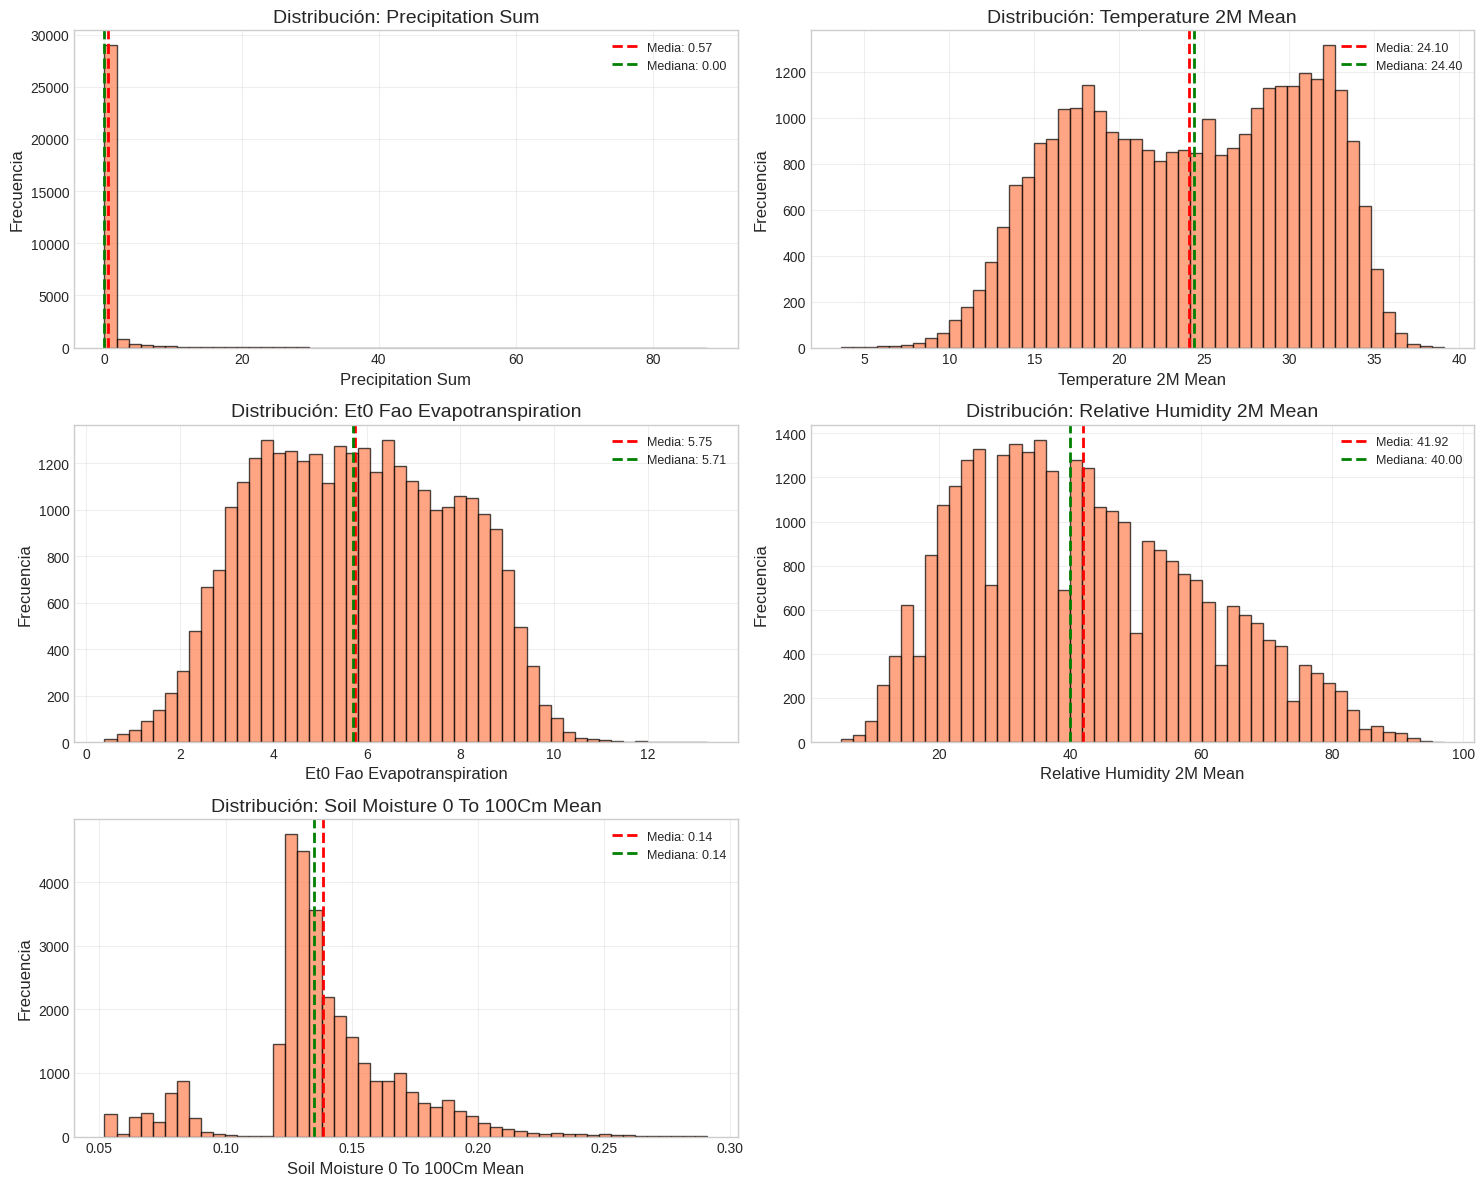

In [8]:
# Variables clave para análisis
vars_key = [
    'precipitation_sum',
    'temperature_2m_mean',
    'et0_fao_evapotranspiration',
    'relative_humidity_2m_mean',
    'soil_moisture_0_to_100cm_mean'
]

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, var in enumerate(vars_key):
    axes[idx].hist(df_meteo[var].dropna(), bins=50, edgecolor='black', alpha=0.7, color='coral')
    axes[idx].axvline(df_meteo[var].mean(), color='red', linestyle='--', linewidth=2, 
                     label=f"Media: {df_meteo[var].mean():.2f}")
    axes[idx].axvline(df_meteo[var].median(), color='green', linestyle='--', linewidth=2,
                     label=f"Mediana: {df_meteo[var].median():.2f}")
    axes[idx].set_xlabel(var.replace('_', ' ').title())
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].set_title(f'Distribución: {var.replace("_", " ").title()}')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(alpha=0.3)

# Eliminar el último subplot vacío
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

## 5. Análisis de Series Temporales
### 5.1 Evolución del Almacenamiento en el Tiempo

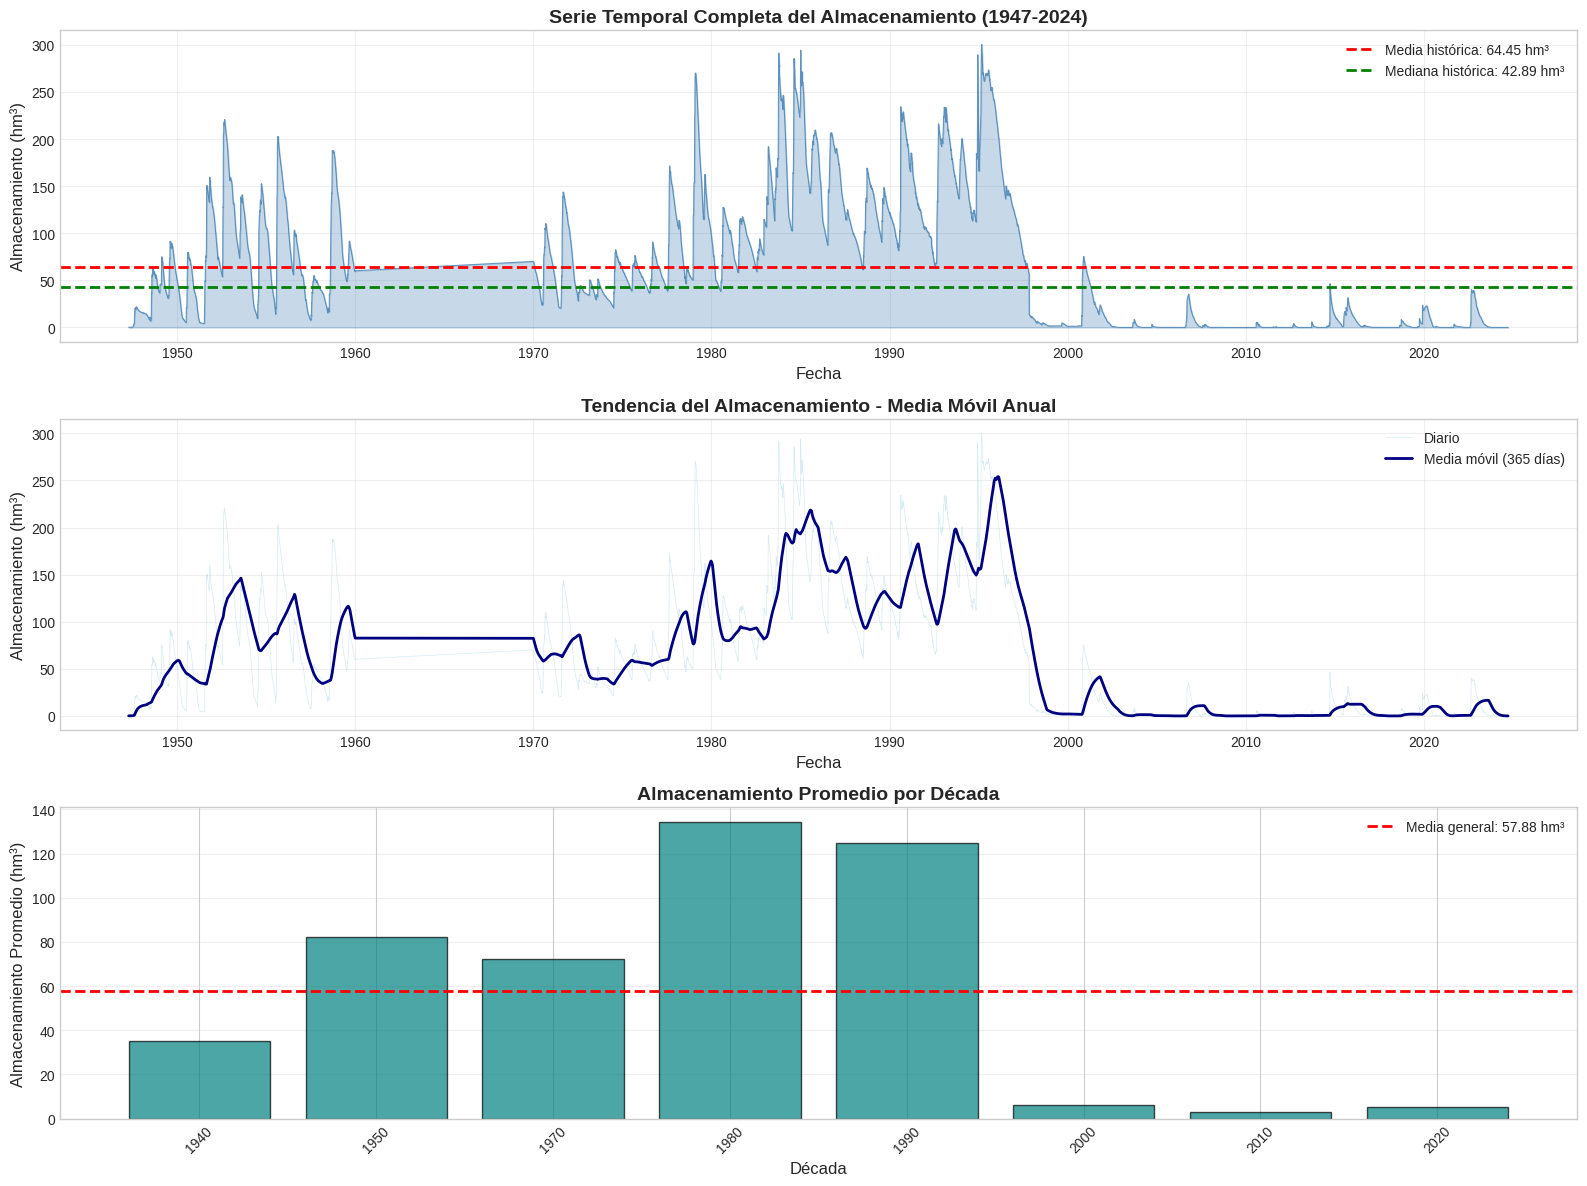

In [9]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Serie temporal completa
axes[0].plot(df_presa['fecha'], df_presa['almacenamiento_hm3'], linewidth=0.8, color='steelblue', alpha=0.8)
axes[0].fill_between(df_presa['fecha'], df_presa['almacenamiento_hm3'], alpha=0.3, color='steelblue')
axes[0].axhline(df_presa['almacenamiento_hm3'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f"Media histórica: {df_presa['almacenamiento_hm3'].mean():.2f} hm³")
axes[0].axhline(df_presa['almacenamiento_hm3'].median(), color='green', linestyle='--', linewidth=2,
                label=f"Mediana histórica: {df_presa['almacenamiento_hm3'].median():.2f} hm³")
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Almacenamiento (hm³)')
axes[0].set_title('Serie Temporal Completa del Almacenamiento (1947-2024)', fontsize=14, weight='bold')
axes[0].legend(loc='upper right')
axes[0].grid(alpha=0.3)

# Promedio móvil (365 días)
df_presa_sorted = df_presa.sort_values('fecha')
df_presa_sorted['ma_365'] = df_presa_sorted['almacenamiento_hm3'].rolling(window=365, min_periods=1).mean()

axes[1].plot(df_presa_sorted['fecha'], df_presa_sorted['almacenamiento_hm3'], 
             linewidth=0.5, color='lightblue', alpha=0.5, label='Diario')
axes[1].plot(df_presa_sorted['fecha'], df_presa_sorted['ma_365'], 
             linewidth=2, color='navy', label='Media móvil (365 días)')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Almacenamiento (hm³)')
axes[1].set_title('Tendencia del Almacenamiento - Media Móvil Anual', fontsize=14, weight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Análisis por década
df_presa_sorted['decada'] = (df_presa_sorted['fecha'].dt.year // 10) * 10
decadas = df_presa_sorted.groupby('decada')['almacenamiento_hm3'].mean().sort_index()

axes[2].bar(decadas.index.astype(str), decadas.values, color='teal', edgecolor='black', alpha=0.7)
axes[2].axhline(decadas.mean(), color='red', linestyle='--', linewidth=2, 
                label=f"Media general: {decadas.mean():.2f} hm³")
axes[2].set_xlabel('Década')
axes[2].set_ylabel('Almacenamiento Promedio (hm³)')
axes[2].set_title('Almacenamiento Promedio por Década', fontsize=14, weight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3, axis='y')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 5.2 Análisis de Estacionalidad

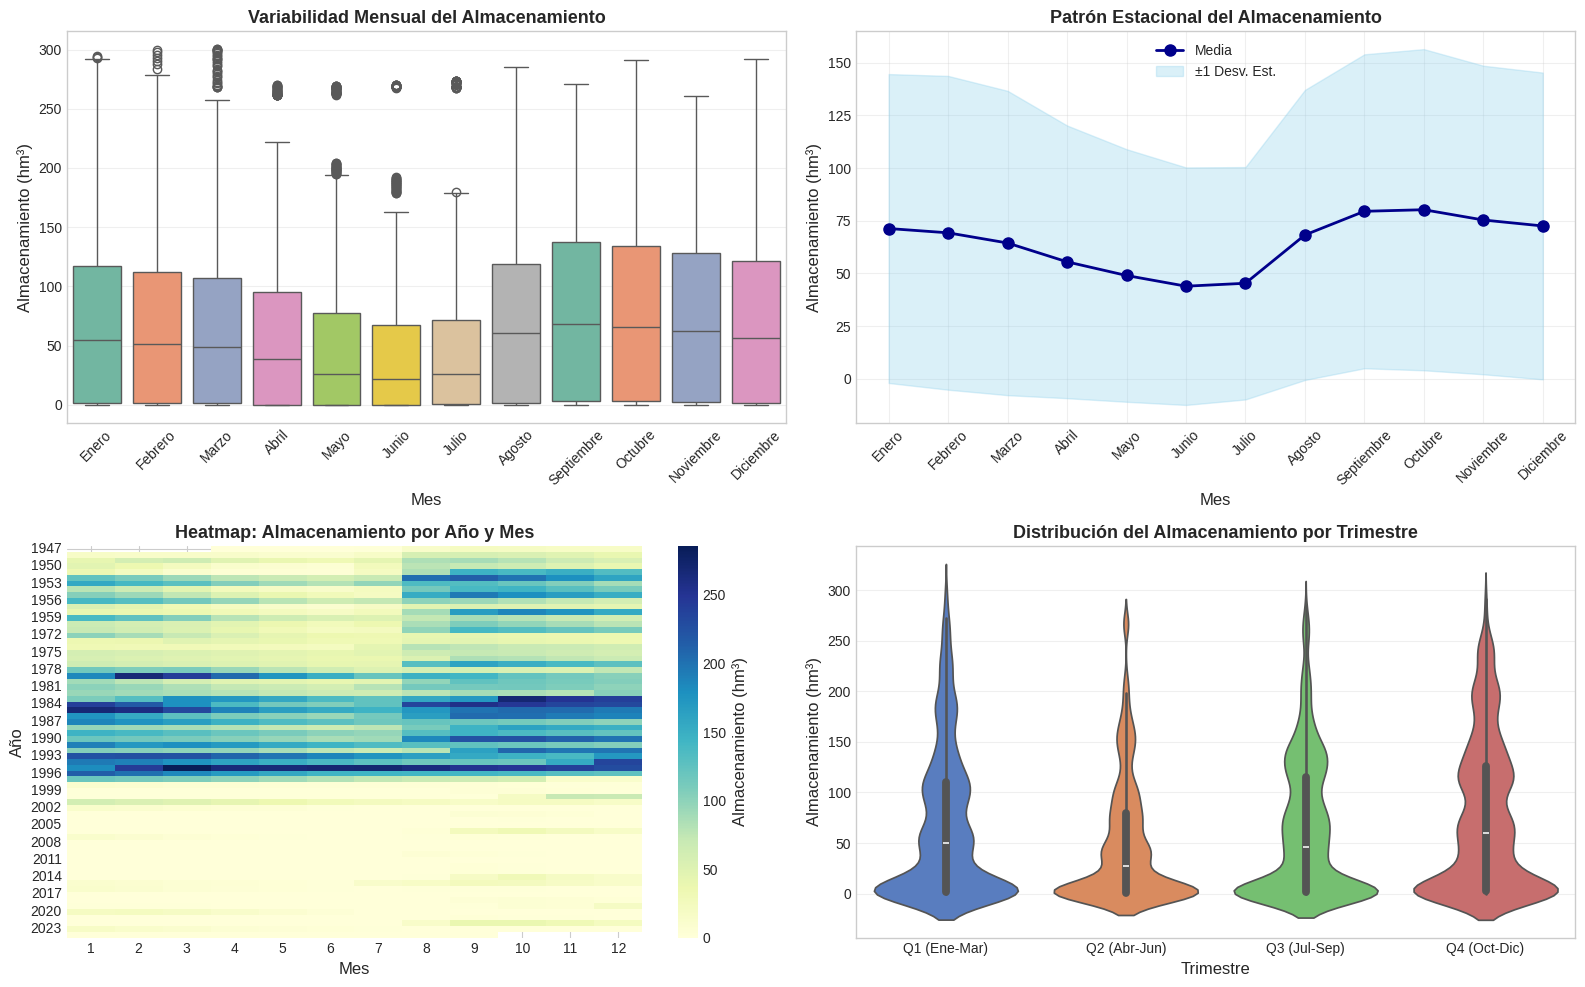

In [10]:
# Agregar información temporal
df_presa_sorted['año'] = df_presa_sorted['fecha'].dt.year
df_presa_sorted['mes'] = df_presa_sorted['fecha'].dt.month
df_presa_sorted['mes_nombre'] = df_presa_sorted['fecha'].dt.strftime('%B')

# Mapeo de meses en español
meses_es = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
df_presa_sorted['mes_nombre'] = df_presa_sorted['mes'].map(meses_es)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Boxplot por mes
mes_order = list(meses_es.values())
sns.boxplot(data=df_presa_sorted, x='mes_nombre', y='almacenamiento_hm3', 
            order=mes_order, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_xlabel('Mes')
axes[0, 0].set_ylabel('Almacenamiento (hm³)')
axes[0, 0].set_title('Variabilidad Mensual del Almacenamiento', fontsize=13, weight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(alpha=0.3, axis='y')

# Promedio mensual
mes_promedio = df_presa_sorted.groupby('mes')['almacenamiento_hm3'].agg(['mean', 'std']).reset_index()
mes_promedio['mes_nombre'] = mes_promedio['mes'].map(meses_es)

axes[0, 1].plot(mes_promedio['mes_nombre'], mes_promedio['mean'], marker='o', linewidth=2, 
                markersize=8, color='darkblue', label='Media')
axes[0, 1].fill_between(range(len(mes_promedio)), 
                        mes_promedio['mean'] - mes_promedio['std'],
                        mes_promedio['mean'] + mes_promedio['std'],
                        alpha=0.3, color='skyblue', label='±1 Desv. Est.')
axes[0, 1].set_xlabel('Mes')
axes[0, 1].set_ylabel('Almacenamiento (hm³)')
axes[0, 1].set_title('Patrón Estacional del Almacenamiento', fontsize=13, weight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Heatmap por año y mes
pivot_data = df_presa_sorted.pivot_table(values='almacenamiento_hm3', 
                                          index='año', columns='mes', aggfunc='mean')
sns.heatmap(pivot_data, cmap='YlGnBu', cbar_kws={'label': 'Almacenamiento (hm³)'}, ax=axes[1, 0])
axes[1, 0].set_xlabel('Mes')
axes[1, 0].set_ylabel('Año')
axes[1, 0].set_title('Heatmap: Almacenamiento por Año y Mes', fontsize=13, weight='bold')

# Violinplot por trimestre
df_presa_sorted['trimestre'] = df_presa_sorted['fecha'].dt.quarter
sns.violinplot(data=df_presa_sorted, x='trimestre', y='almacenamiento_hm3', 
               ax=axes[1, 1], palette='muted')
axes[1, 1].set_xlabel('Trimestre')
axes[1, 1].set_ylabel('Almacenamiento (hm³)')
axes[1, 1].set_title('Distribución del Almacenamiento por Trimestre', fontsize=13, weight='bold')
axes[1, 1].set_xticklabels(['Q1 (Ene-Mar)', 'Q2 (Abr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dic)'])
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 5.3 Variables Meteorológicas en el Tiempo

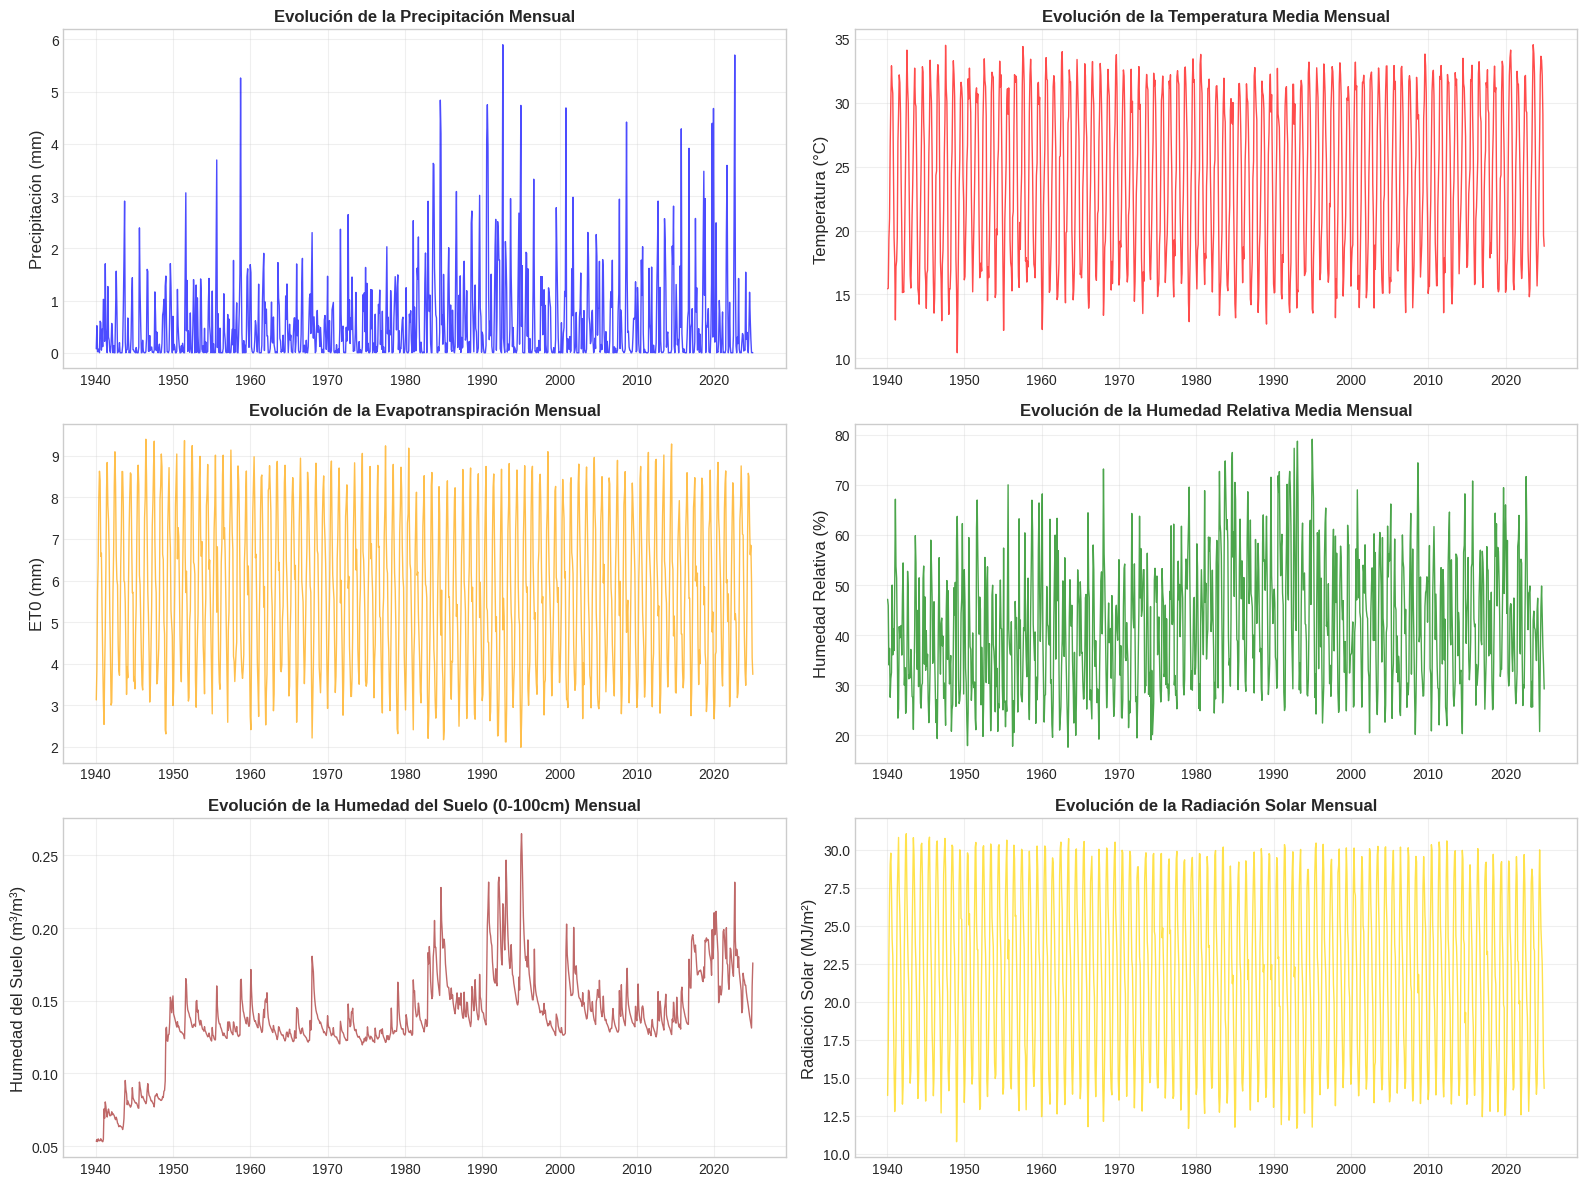

In [11]:
# Resample a mensual para mejor visualización
df_meteo_sorted = df_meteo.sort_values('time')
df_meteo_sorted.set_index('time', inplace=True)
df_meteo_monthly = df_meteo_sorted.resample('M').mean()

fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Precipitación
axes[0, 0].plot(df_meteo_monthly.index, df_meteo_monthly['precipitation_sum'], 
                linewidth=1, color='blue', alpha=0.7)
axes[0, 0].set_ylabel('Precipitación (mm)')
axes[0, 0].set_title('Evolución de la Precipitación Mensual', fontsize=12, weight='bold')
axes[0, 0].grid(alpha=0.3)

# Temperatura
axes[0, 1].plot(df_meteo_monthly.index, df_meteo_monthly['temperature_2m_mean'], 
                linewidth=1, color='red', alpha=0.7)
axes[0, 1].set_ylabel('Temperatura (°C)')
axes[0, 1].set_title('Evolución de la Temperatura Media Mensual', fontsize=12, weight='bold')
axes[0, 1].grid(alpha=0.3)

# Evapotranspiración
axes[1, 0].plot(df_meteo_monthly.index, df_meteo_monthly['et0_fao_evapotranspiration'], 
                linewidth=1, color='orange', alpha=0.7)
axes[1, 0].set_ylabel('ET0 (mm)')
axes[1, 0].set_title('Evolución de la Evapotranspiración Mensual', fontsize=12, weight='bold')
axes[1, 0].grid(alpha=0.3)

# Humedad relativa
axes[1, 1].plot(df_meteo_monthly.index, df_meteo_monthly['relative_humidity_2m_mean'], 
                linewidth=1, color='green', alpha=0.7)
axes[1, 1].set_ylabel('Humedad Relativa (%)')
axes[1, 1].set_title('Evolución de la Humedad Relativa Media Mensual', fontsize=12, weight='bold')
axes[1, 1].grid(alpha=0.3)

# Humedad del suelo
axes[2, 0].plot(df_meteo_monthly.index, df_meteo_monthly['soil_moisture_0_to_100cm_mean'], 
                linewidth=1, color='brown', alpha=0.7)
axes[2, 0].set_ylabel('Humedad del Suelo (m³/m³)')
axes[2, 0].set_title('Evolución de la Humedad del Suelo (0-100cm) Mensual', fontsize=12, weight='bold')
axes[2, 0].grid(alpha=0.3)

# Radiación solar
axes[2, 1].plot(df_meteo_monthly.index, df_meteo_monthly['shortwave_radiation_sum'], 
                linewidth=1, color='gold', alpha=0.7)
axes[2, 1].set_ylabel('Radiación Solar (MJ/m²)')
axes[2, 1].set_title('Evolución de la Radiación Solar Mensual', fontsize=12, weight='bold')
axes[2, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Fusión de Datos y Análisis Bivariado
### 6.1 Fusión de Datasets

In [12]:
# Reset index del dataset meteorológico
df_meteo_sorted = df_meteo_sorted.reset_index()

# Fusionar datasets
df_merged = pd.merge(
    df_presa_sorted[['fecha', 'almacenamiento_hm3']],
    df_meteo_sorted,
    left_on='fecha',
    right_on='time',
    how='inner'
)

print(f"📊 Dataset fusionado: {df_merged.shape[0]:,} registros × {df_merged.shape[1]} columnas")
print(f"\nRango temporal: {df_merged['fecha'].min().date()} a {df_merged['fecha'].max().date()}")
print(f"\nPrimeras filas:")
display(df_merged.head())

📊 Dataset fusionado: 24,631 registros × 19 columnas

Rango temporal: 1947-04-14 a 2024-09-19

Primeras filas:


fecha  almacenamiento_hm3       time  precipitation_sum  rain_sum  \
0 1947-04-14                0.09 1947-04-14                0.0       0.0   
1 1947-04-15                0.11 1947-04-15                0.0       0.0   
2 1947-04-16                0.11 1947-04-16                0.0       0.0   
3 1947-04-17                0.12 1947-04-17                0.0       0.0   
4 1947-04-18                0.12 1947-04-18                0.0       0.0   

   et0_fao_evapotranspiration  temperature_2m_mean  temperature_2m_max  \
0                        9.04                 24.1                32.4   
1                        7.89                 24.4                33.7   
2                        7.79                 26.1                35.3   
3                        8.71                 27.3                36.4   
4                        8.94                 24.9                32.6   

   precipitation_hours  wind_speed_10m_max  wind_speed_10m_mean  \
0                  0.0                20.8                 14.4   
1                  0.0                19.2                  9.9   
2                  0.0                14.8                  8.4   
3                  0.0                19.0                 11.1   
4                  0.0                26.8                 15.2   

   vapour_pressure_deficit_max  shortwave_radiation_sum  \
0                         4.61                    28.80   
1                         4.95                    28.67   
2                         5.42                    28.81   
3                         5.71                    28.86   
4                         4.56                    28.96   

   relative_humidity_2m_mean  cloud_cover_mean  soil_moisture_0_to_100cm_mean  \
0                         10                 0                           0.08   
1                         14                 0                           0.08   
2                         14                 0                           0.08   
3                         14                10                           0.08   
4                         17                10                           0.08   

   soil_moisture_0_to_7cm_mean  soil_moisture_28_to_100cm_mean  \
0                        0.046                           0.075   
1                        0.045                           0.075   
2                        0.045                           0.075   
3                        0.044                           0.075   
4                        0.044                           0.075   

   soil_moisture_7_to_28cm_mean  
0                          0.11  
1                          0.11  
2                          0.11  
3                          0.11  
4                          0.11

### 6.2 Matriz de Correlaciones

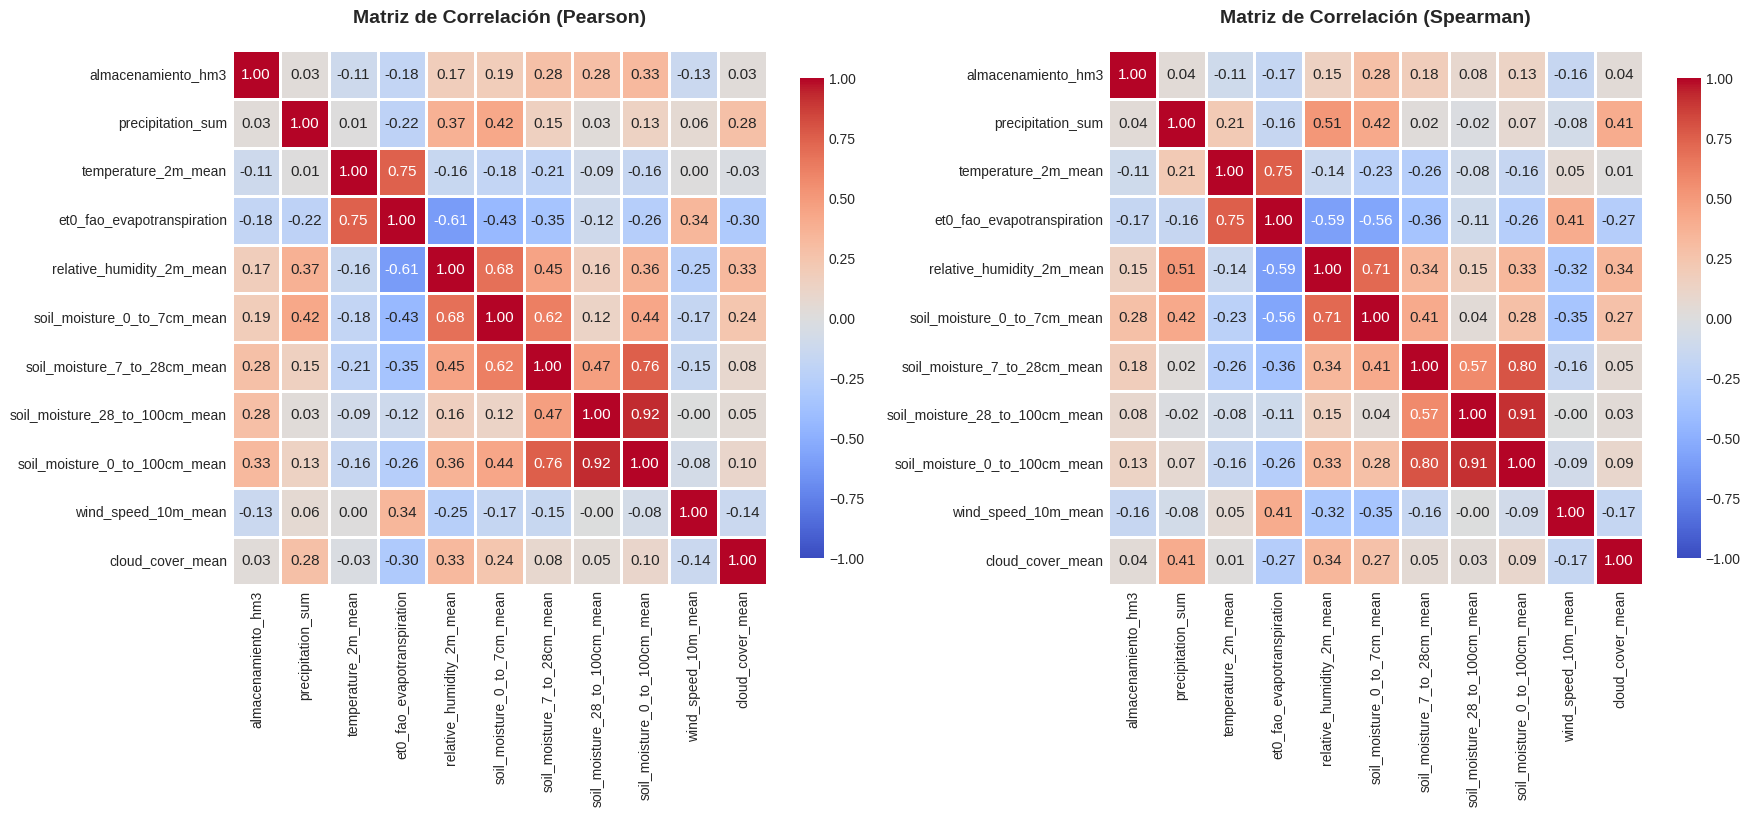


📊 CORRELACIONES CON ALMACENAMIENTO


Pearson  Spearman
soil_moisture_0_to_100cm_mean   0.326870  0.127063
soil_moisture_28_to_100cm_mean  0.281411  0.080499
soil_moisture_7_to_28cm_mean    0.276548  0.179081
soil_moisture_0_to_7cm_mean     0.186890  0.281115
et0_fao_evapotranspiration     -0.183528 -0.170577
relative_humidity_2m_mean       0.173603  0.148232
wind_speed_10m_mean            -0.133846 -0.157981
temperature_2m_mean            -0.113401 -0.106086
precipitation_sum               0.028401  0.035990
cloud_cover_mean                0.027404  0.037181

In [13]:
# Seleccionar variables numéricas clave
vars_corr = [
    'almacenamiento_hm3',
    'precipitation_sum',
    'temperature_2m_mean',
    'et0_fao_evapotranspiration',
    'relative_humidity_2m_mean',
    'soil_moisture_0_to_7cm_mean',
    'soil_moisture_7_to_28cm_mean',
    'soil_moisture_28_to_100cm_mean',
    'soil_moisture_0_to_100cm_mean',
    'wind_speed_10m_mean',
    'cloud_cover_mean'
]

# Calcular matriz de correlaciones (Pearson y Spearman)
corr_pearson = df_merged[vars_corr].corr(method='pearson')
corr_spearman = df_merged[vars_corr].corr(method='spearman')

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Heatmap Pearson
sns.heatmap(corr_pearson, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0],
            vmin=-1, vmax=1)
axes[0].set_title('Matriz de Correlación (Pearson)', fontsize=14, weight='bold', pad=20)

# Heatmap Spearman
sns.heatmap(corr_spearman, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[1],
            vmin=-1, vmax=1)
axes[1].set_title('Matriz de Correlación (Spearman)', fontsize=14, weight='bold', pad=20)

plt.tight_layout()
plt.show()

# Correlaciones con almacenamiento
print("\n📊 CORRELACIONES CON ALMACENAMIENTO")
print("=" * 60)
corr_with_storage = pd.DataFrame({
    'Pearson': corr_pearson['almacenamiento_hm3'].drop('almacenamiento_hm3'),
    'Spearman': corr_spearman['almacenamiento_hm3'].drop('almacenamiento_hm3')
}).sort_values('Pearson', ascending=False, key=abs)

display(corr_with_storage)

### 6.3 Relaciones Bivariadas - Scatter Plots

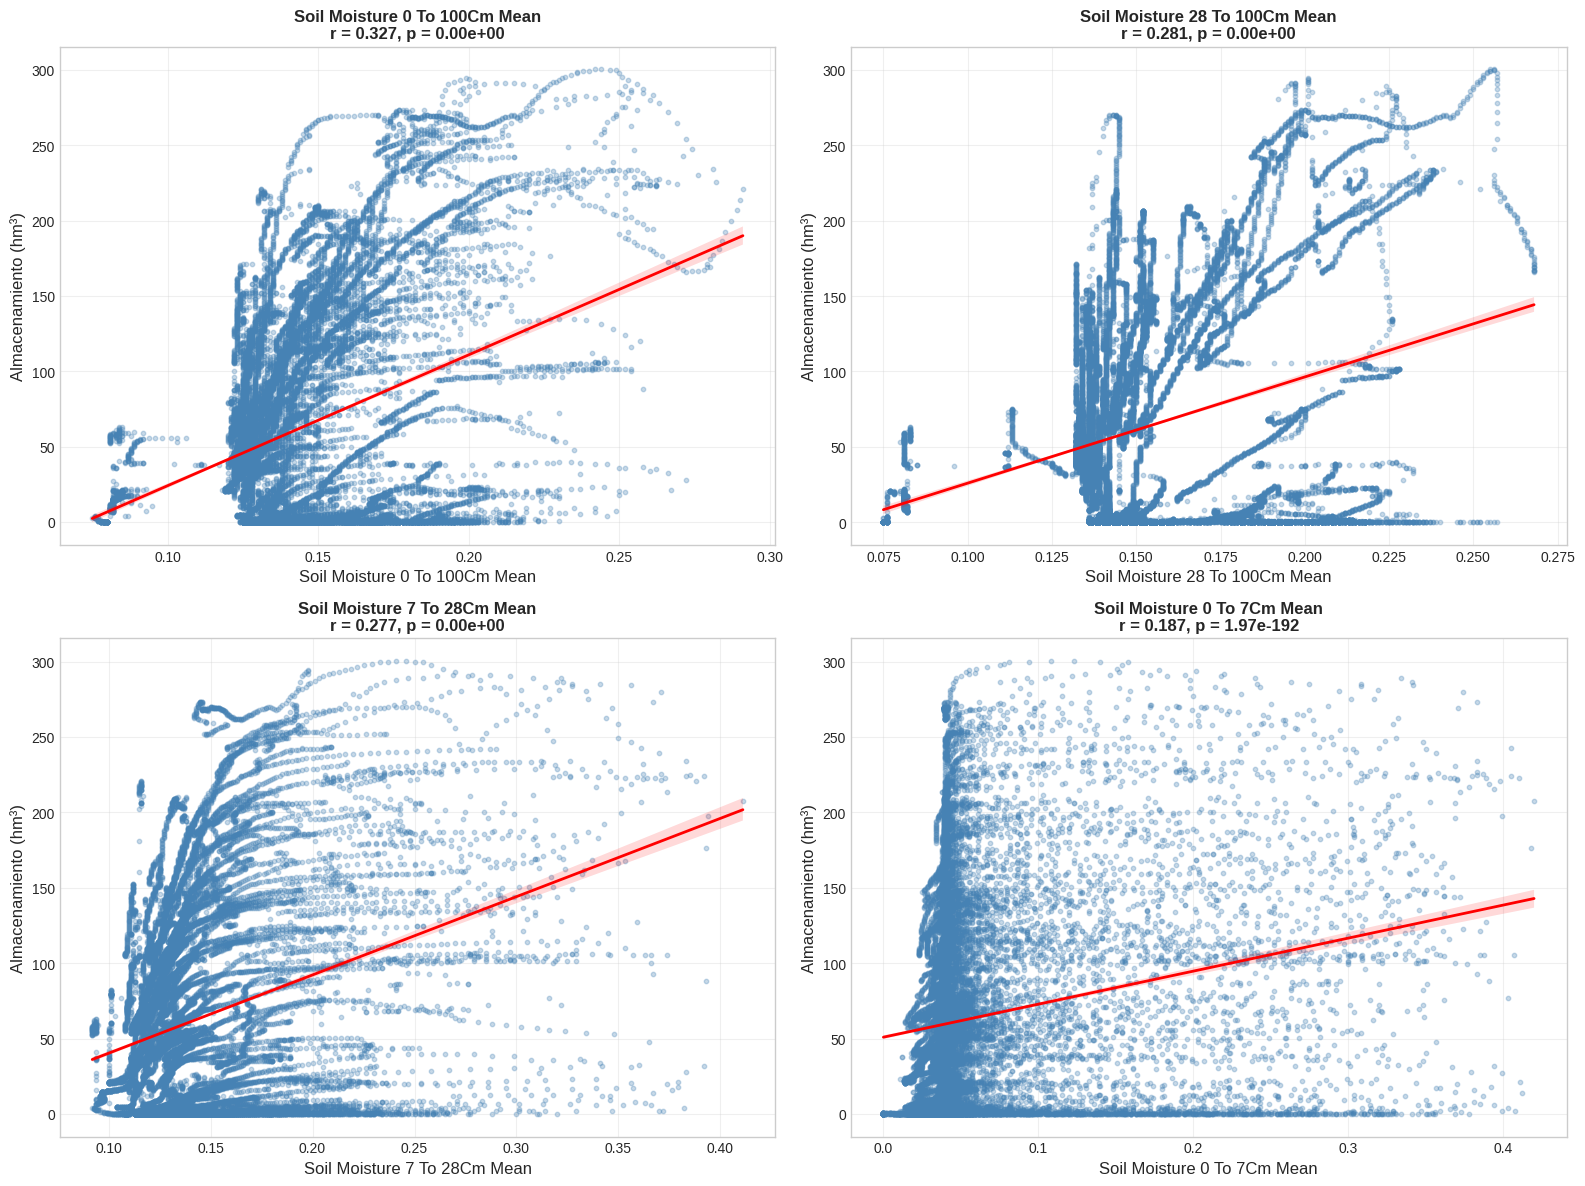

In [14]:
# Variables de mayor correlación con almacenamiento
top_vars = corr_with_storage.head(4).index.tolist()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, var in enumerate(top_vars):
    # Scatter plot con regresión
    sns.regplot(data=df_merged, x=var, y='almacenamiento_hm3', 
                scatter_kws={'alpha': 0.3, 's': 10, 'color': 'steelblue'},
                line_kws={'color': 'red', 'linewidth': 2},
                ax=axes[idx])
    
    # Calcular R² y p-value
    mask = df_merged[[var, 'almacenamiento_hm3']].notna().all(axis=1)
    r, p_val = pearsonr(df_merged.loc[mask, var], df_merged.loc[mask, 'almacenamiento_hm3'])
    
    axes[idx].set_xlabel(var.replace('_', ' ').title())
    axes[idx].set_ylabel('Almacenamiento (hm³)')
    axes[idx].set_title(f'{var.replace("_", " ").title()}\nr = {r:.3f}, p = {p_val:.2e}', 
                        fontsize=12, weight='bold')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 6.4 Análisis de Precipitación vs Almacenamiento

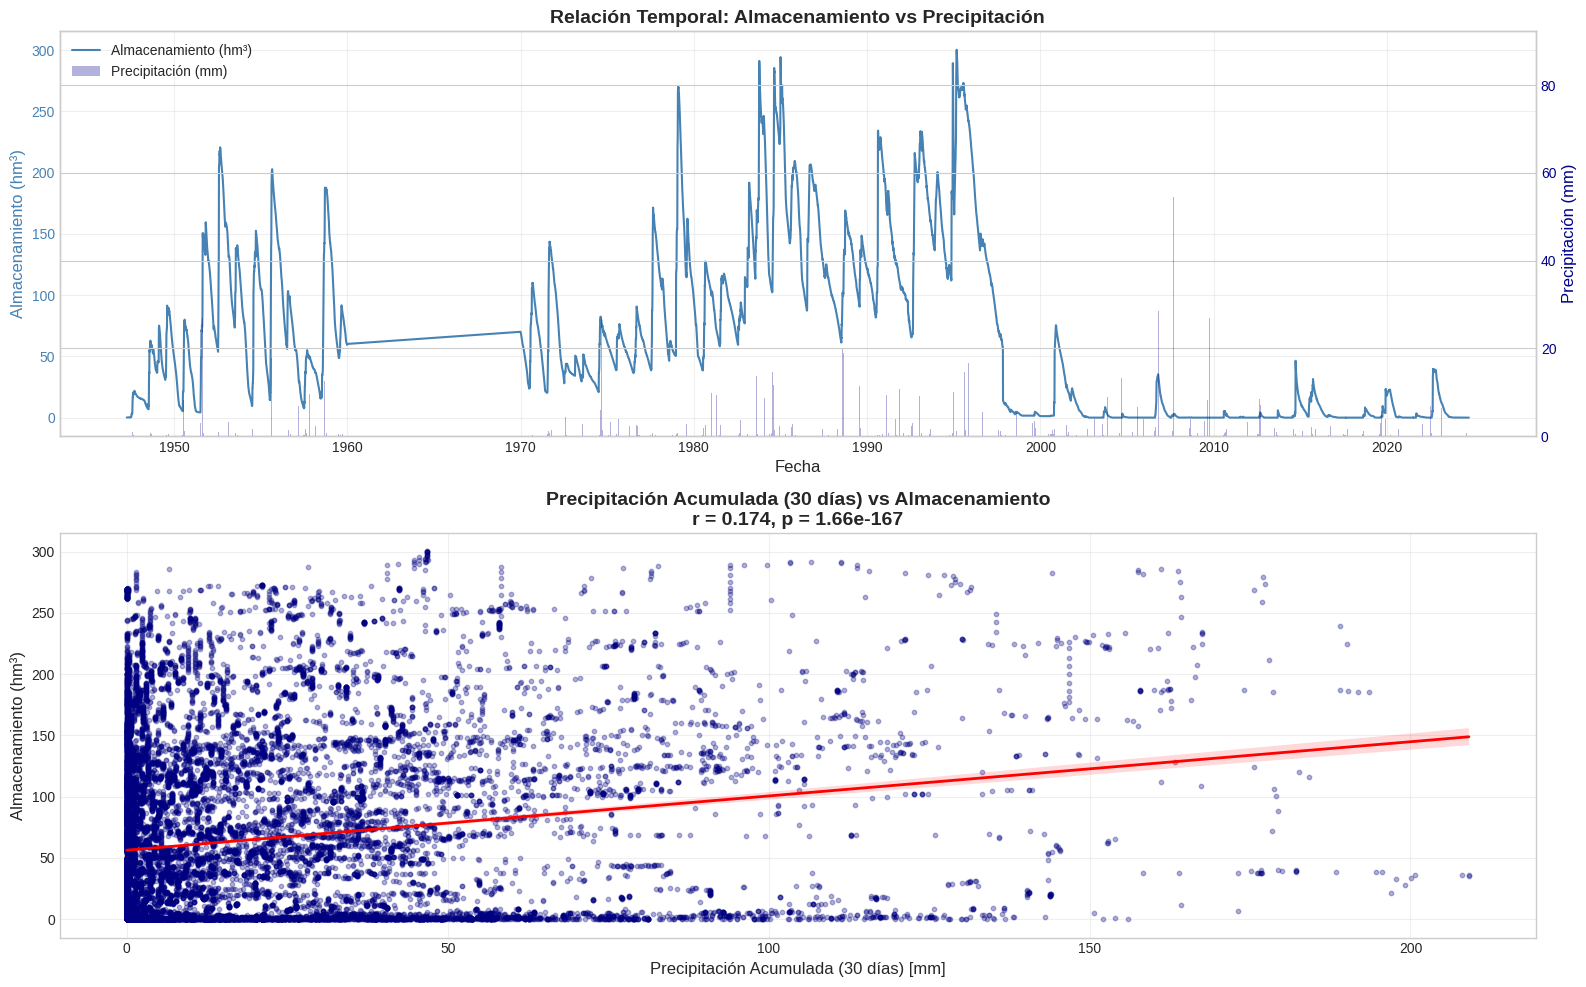

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Serie temporal dual
ax1 = axes[0]
ax2 = ax1.twinx()

# Almacenamiento en eje primario
line1 = ax1.plot(df_merged['fecha'], df_merged['almacenamiento_hm3'], 
                 color='steelblue', linewidth=1.5, label='Almacenamiento (hm³)')
ax1.set_ylabel('Almacenamiento (hm³)', color='steelblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='steelblue')

# Precipitación en eje secundario (barras)
line2 = ax2.bar(df_merged['fecha'], df_merged['precipitation_sum'], 
                color='darkblue', alpha=0.3, width=1, label='Precipitación (mm)')
ax2.set_ylabel('Precipitación (mm)', color='darkblue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='darkblue')

ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_title('Relación Temporal: Almacenamiento vs Precipitación', fontsize=14, weight='bold')
ax1.grid(alpha=0.3)

# Leyenda combinada
lines = line1 + [line2]
labels = ['Almacenamiento (hm³)', 'Precipitación (mm)']
ax1.legend(lines, labels, loc='upper left')

# Precipitación acumulada vs almacenamiento
df_merged_sorted = df_merged.sort_values('fecha')
df_merged_sorted['precip_acum_30d'] = df_merged_sorted['precipitation_sum'].rolling(window=30, min_periods=1).sum()

axes[1].scatter(df_merged_sorted['precip_acum_30d'], df_merged_sorted['almacenamiento_hm3'],
                alpha=0.3, s=10, color='navy')
sns.regplot(data=df_merged_sorted, x='precip_acum_30d', y='almacenamiento_hm3',
            scatter=False, color='red', line_kws={'linewidth': 2}, ax=axes[1])

# Calcular correlación
mask = df_merged_sorted[['precip_acum_30d', 'almacenamiento_hm3']].notna().all(axis=1)
r, p_val = pearsonr(df_merged_sorted.loc[mask, 'precip_acum_30d'], 
                    df_merged_sorted.loc[mask, 'almacenamiento_hm3'])

axes[1].set_xlabel('Precipitación Acumulada (30 días) [mm]', fontsize=12)
axes[1].set_ylabel('Almacenamiento (hm³)', fontsize=12)
axes[1].set_title(f'Precipitación Acumulada (30 días) vs Almacenamiento\nr = {r:.3f}, p = {p_val:.2e}', 
                  fontsize=14, weight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Análisis de Condiciones: Con Agua vs Sin Agua
### 7.1 Definición de Grupos

📊 DISTRIBUCIÓN DE CONDICIONES
condicion
Con agua    19513
Sin agua     5118
Name: count, dtype: int64

Porcentaje:
condicion
Con agua    79.221306
Sin agua    20.778694
Name: proportion, dtype: float64


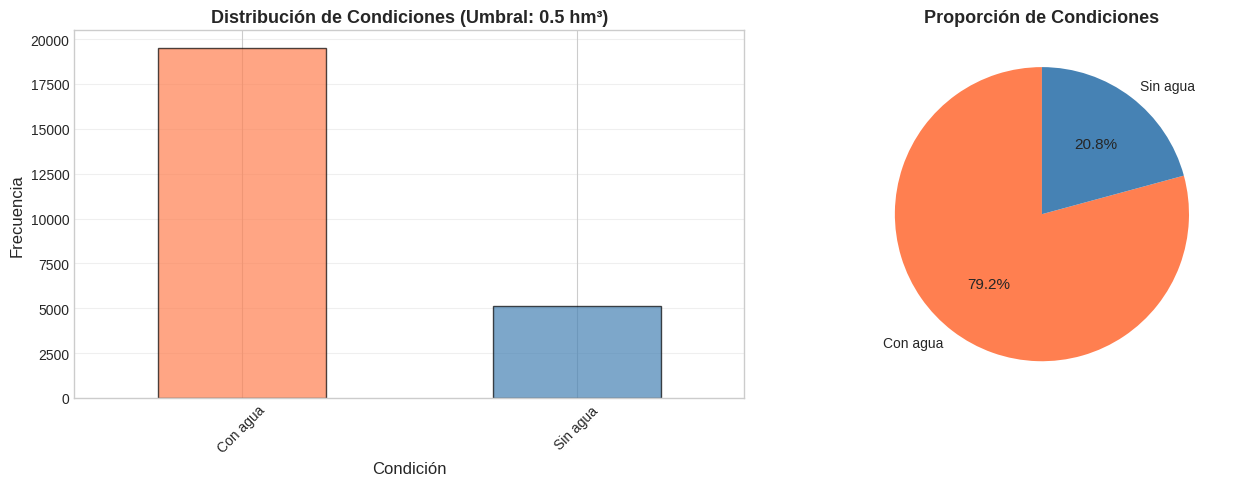

In [16]:
# Crear variable categórica
threshold = 0.5  # hm³
df_merged['condicion'] = df_merged['almacenamiento_hm3'].apply(
    lambda x: 'Sin agua' if x <= threshold else 'Con agua'
)

# Distribución de grupos
print("📊 DISTRIBUCIÓN DE CONDICIONES")
print("=" * 60)
print(df_merged['condicion'].value_counts())
print(f"\nPorcentaje:")
print(df_merged['condicion'].value_counts(normalize=True) * 100)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
df_merged['condicion'].value_counts().plot(kind='bar', ax=axes[0], color=['coral', 'steelblue'],
                                            edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Condición')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Condiciones (Umbral: 0.5 hm³)', fontsize=13, weight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(alpha=0.3, axis='y')

# Gráfico de pastel
df_merged['condicion'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                            colors=['coral', 'steelblue'], startangle=90)
axes[1].set_ylabel('')
axes[1].set_title('Proporción de Condiciones', fontsize=13, weight='bold')

plt.tight_layout()
plt.show()

### 7.2 Comparación de Variables Meteorológicas por Condición


📊 COMPARACIÓN DE VARIABLES POR CONDICIÓN


precipitation_sum              temperature_2m_mean               \
                       mean median   std                mean median   std   
condicion                                                                   
Con agua               0.64    0.0  3.03               24.06   24.4  6.66   
Sin agua               0.51    0.0  2.45               24.73   25.2  6.69   

          et0_fao_evapotranspiration              relative_humidity_2m_mean  \
                                mean median   std                      mean   
condicion                                                                     
Con agua                        5.61   5.55  2.03                     43.65   
Sin agua                        6.08   6.25  2.09                     39.80   

                        soil_moisture_0_to_100cm_mean               
          median    std                          mean median   std  
condicion                                                           
Con agua    42.0  18.00                          0.15   0.14  0.03  
Sin agua    38.0  16.72                          0.15   0.14  0.02

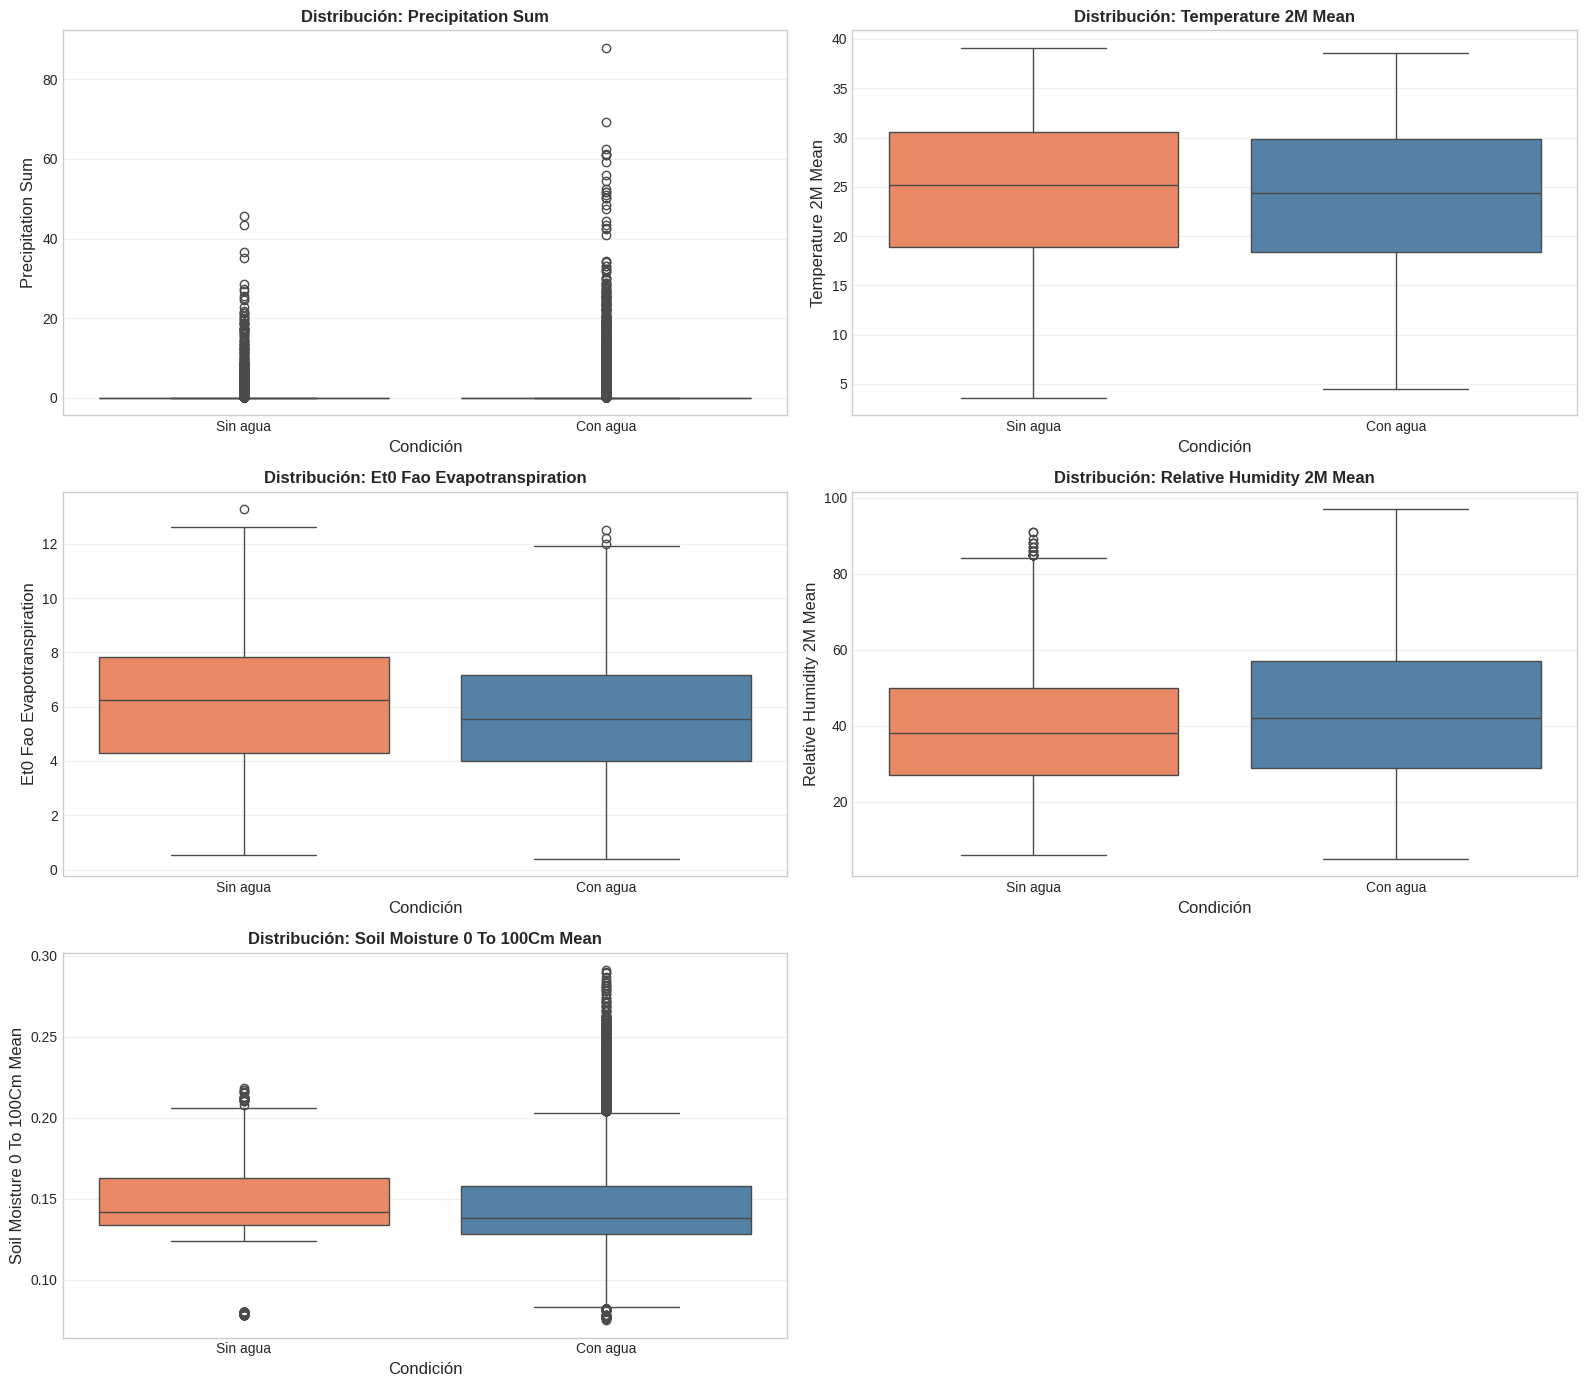

In [17]:
# Variables a comparar
vars_compare = [
    'precipitation_sum',
    'temperature_2m_mean',
    'et0_fao_evapotranspiration',
    'relative_humidity_2m_mean',
    'soil_moisture_0_to_100cm_mean'
]

# Estadísticas por grupo
print("\n📊 COMPARACIÓN DE VARIABLES POR CONDICIÓN")
print("=" * 80)
comparacion = df_merged.groupby('condicion')[vars_compare].agg(['mean', 'median', 'std'])
display(comparacion.round(2))

# Visualización con boxplots
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, var in enumerate(vars_compare):
    sns.boxplot(data=df_merged, x='condicion', y=var, ax=axes[idx],
                palette={'Sin agua': 'coral', 'Con agua': 'steelblue'})
    axes[idx].set_xlabel('Condición')
    axes[idx].set_ylabel(var.replace('_', ' ').title())
    axes[idx].set_title(f'Distribución: {var.replace("_", " ").title()}', fontsize=12, weight='bold')
    axes[idx].grid(alpha=0.3, axis='y')

# Eliminar subplot vacío
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### 7.3 Pruebas Estadísticas de Diferencias

In [18]:
print("\n🔬 PRUEBAS ESTADÍSTICAS - MANN-WHITNEY U")
print("=" * 80)
print("(Prueba no paramétrica para comparar dos grupos independientes)\n")

resultados = []

for var in vars_compare:
    # Separar grupos
    grupo_con = df_merged[df_merged['condicion'] == 'Con agua'][var].dropna()
    grupo_sin = df_merged[df_merged['condicion'] == 'Sin agua'][var].dropna()
    
    # Prueba Mann-Whitney U
    stat, p_val = mannwhitneyu(grupo_con, grupo_sin, alternative='two-sided')
    
    # Diferencia de medianas
    diff_median = grupo_con.median() - grupo_sin.median()
    
    # Significancia
    sig = '✅ Significativo' if p_val < 0.05 else '❌ No significativo'
    
    resultados.append({
        'Variable': var.replace('_', ' ').title(),
        'Estadístico U': f"{stat:,.2f}",
        'p-valor': f"{p_val:.2e}",
        'Diff. Medianas': f"{diff_median:.2f}",
        'Significancia': sig
    })

df_resultados = pd.DataFrame(resultados)
display(df_resultados)

print("\n💡 Interpretación:")
print("  • p-valor < 0.05: Diferencia estadísticamente significativa entre grupos")
print("  • Diff. Medianas (+): Variable mayor en 'Con agua'")
print("  • Diff. Medianas (-): Variable mayor en 'Sin agua'")


🔬 PRUEBAS ESTADÍSTICAS - MANN-WHITNEY U
(Prueba no paramétrica para comparar dos grupos independientes)



Variable  Estadístico U   p-valor Diff. Medianas  \
0              Precipitation Sum  51,750,805.50  1.17e-08           0.00   
1            Temperature 2M Mean  47,065,256.00  2.36e-10          -0.80   
2     Et0 Fao Evapotranspiration  43,462,763.00  2.45e-46          -0.70   
3      Relative Humidity 2M Mean  56,024,530.50  2.91e-41           4.00   
4  Soil Moisture 0 To 100Cm Mean  42,286,166.50  4.94e-64          -0.00   

     Significancia  
0  ✅ Significativo  
1  ✅ Significativo  
2  ✅ Significativo  
3  ✅ Significativo  
4  ✅ Significativo


💡 Interpretación:
  • p-valor < 0.05: Diferencia estadísticamente significativa entre grupos
  • Diff. Medianas (+): Variable mayor en 'Con agua'
  • Diff. Medianas (-): Variable mayor en 'Sin agua'


## 8. Análisis de Humedad del Suelo por Profundidad

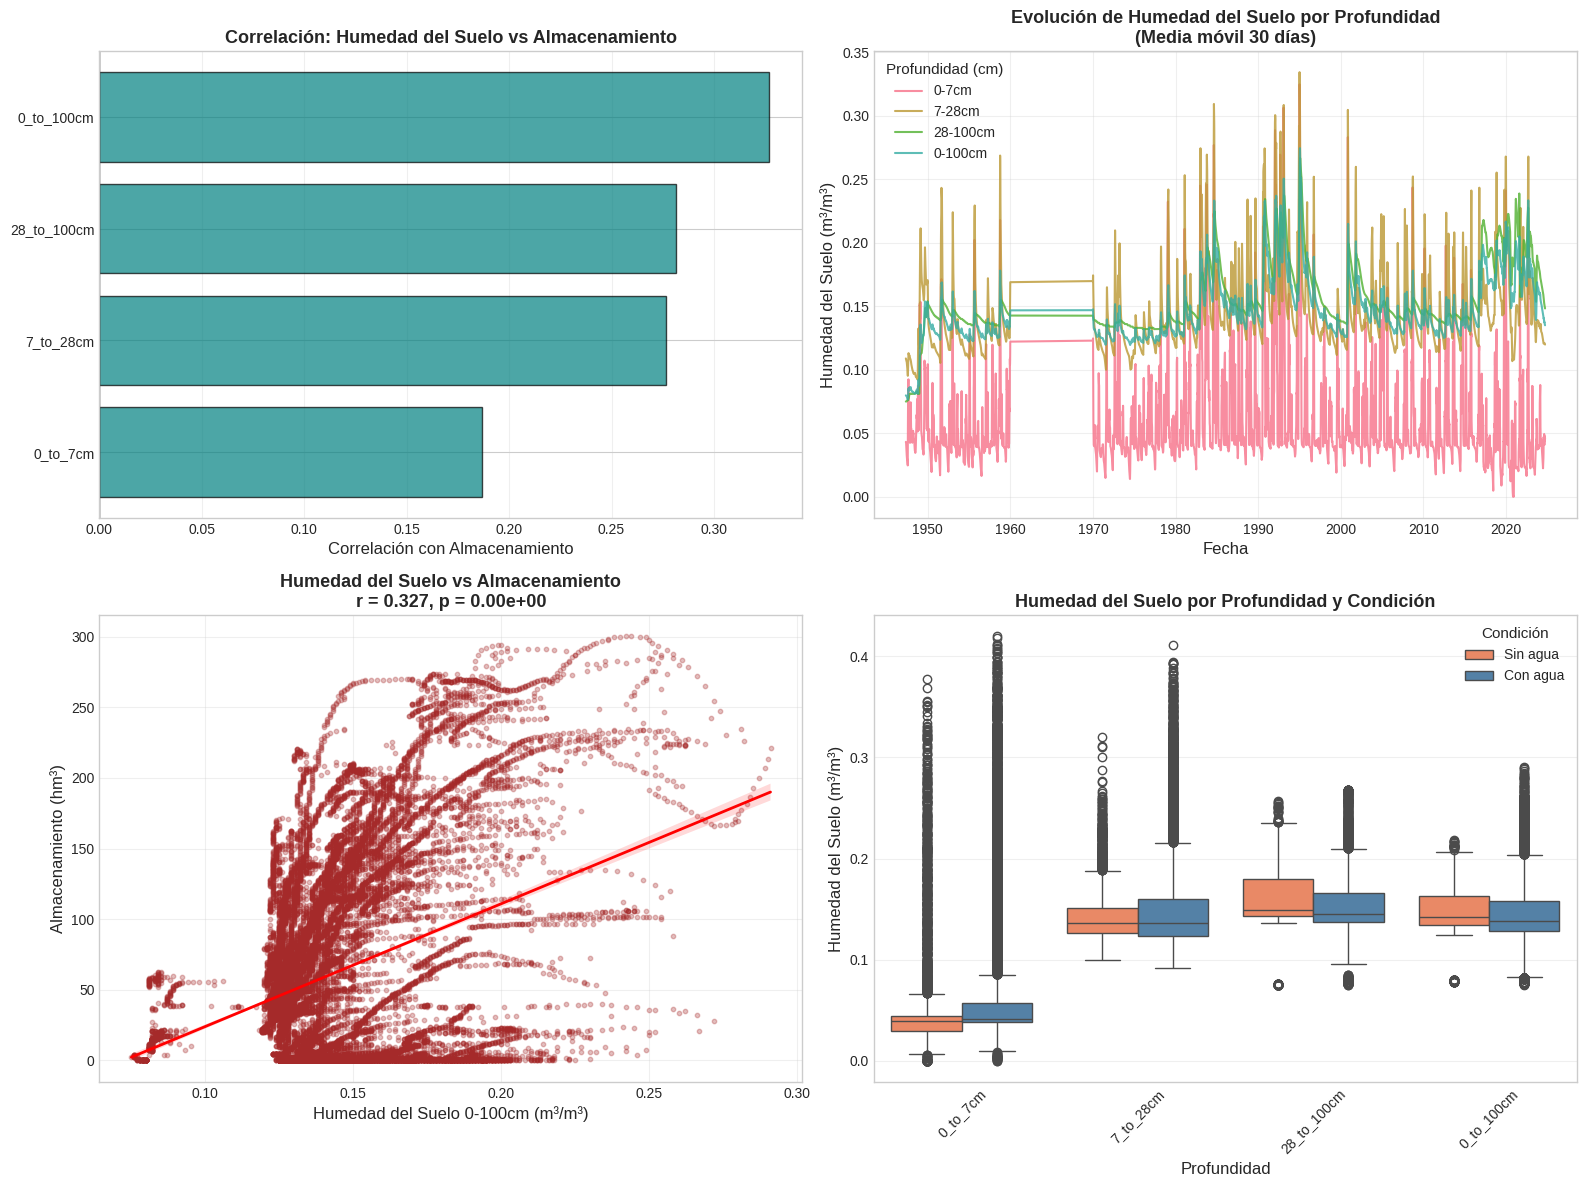

In [19]:
soil_vars = [
    'soil_moisture_0_to_7cm_mean',
    'soil_moisture_7_to_28cm_mean',
    'soil_moisture_28_to_100cm_mean',
    'soil_moisture_0_to_100cm_mean'
]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Correlaciones con almacenamiento
corr_soil = df_merged[['almacenamiento_hm3'] + soil_vars].corr()['almacenamiento_hm3'].drop('almacenamiento_hm3')

axes[0, 0].barh(range(len(corr_soil)), corr_soil.values, color='teal', edgecolor='black', alpha=0.7)
axes[0, 0].set_yticks(range(len(corr_soil)))
axes[0, 0].set_yticklabels([var.replace('soil_moisture_', '').replace('_mean', '') for var in corr_soil.index])
axes[0, 0].set_xlabel('Correlación con Almacenamiento')
axes[0, 0].set_title('Correlación: Humedad del Suelo vs Almacenamiento', fontsize=13, weight='bold')
axes[0, 0].axvline(0, color='black', linewidth=1)
axes[0, 0].grid(alpha=0.3, axis='x')

# Series temporales de humedad del suelo
for var in soil_vars:
    label = var.replace('soil_moisture_', '').replace('_mean', '').replace('_to_', '-')
    axes[0, 1].plot(df_merged['fecha'], df_merged[var].rolling(window=30).mean(), 
                    linewidth=1.5, label=label, alpha=0.8)

axes[0, 1].set_xlabel('Fecha')
axes[0, 1].set_ylabel('Humedad del Suelo (m³/m³)')
axes[0, 1].set_title('Evolución de Humedad del Suelo por Profundidad\n(Media móvil 30 días)', 
                     fontsize=13, weight='bold')
axes[0, 1].legend(title='Profundidad (cm)')
axes[0, 1].grid(alpha=0.3)

# Relación humedad total del suelo vs almacenamiento
sns.regplot(data=df_merged, x='soil_moisture_0_to_100cm_mean', y='almacenamiento_hm3',
            scatter_kws={'alpha': 0.3, 's': 10, 'color': 'brown'},
            line_kws={'color': 'red', 'linewidth': 2},
            ax=axes[1, 0])

mask = df_merged[['soil_moisture_0_to_100cm_mean', 'almacenamiento_hm3']].notna().all(axis=1)
r, p_val = pearsonr(df_merged.loc[mask, 'soil_moisture_0_to_100cm_mean'], 
                    df_merged.loc[mask, 'almacenamiento_hm3'])

axes[1, 0].set_xlabel('Humedad del Suelo 0-100cm (m³/m³)')
axes[1, 0].set_ylabel('Almacenamiento (hm³)')
axes[1, 0].set_title(f'Humedad del Suelo vs Almacenamiento\nr = {r:.3f}, p = {p_val:.2e}', 
                     fontsize=13, weight='bold')
axes[1, 0].grid(alpha=0.3)

# Comparación por condición
df_soil_melt = df_merged.melt(
    id_vars=['condicion'],
    value_vars=soil_vars,
    var_name='profundidad',
    value_name='humedad'
)

sns.boxplot(data=df_soil_melt, x='profundidad', y='humedad', hue='condicion',
            palette={'Sin agua': 'coral', 'Con agua': 'steelblue'},
            ax=axes[1, 1])

axes[1, 1].set_xlabel('Profundidad')
axes[1, 1].set_ylabel('Humedad del Suelo (m³/m³)')
axes[1, 1].set_title('Humedad del Suelo por Profundidad y Condición', fontsize=13, weight='bold')
axes[1, 1].set_xticklabels([var.replace('soil_moisture_', '').replace('_mean', '') for var in soil_vars], 
                           rotation=45)
axes[1, 1].legend(title='Condición')
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 9. Análisis de Extremos y Eventos

In [20]:
# Identificar eventos extremos
print("🔍 ANÁLISIS DE EVENTOS EXTREMOS")
print("=" * 80)

# Almacenamiento máximo
max_storage = df_merged['almacenamiento_hm3'].max()
max_storage_date = df_merged.loc[df_merged['almacenamiento_hm3'].idxmax(), 'fecha']
print(f"\n📈 Almacenamiento máximo: {max_storage:.2f} hm³")
print(f"   Fecha: {max_storage_date.date()}")

# Almacenamiento mínimo (excluyendo 0)
min_storage = df_merged[df_merged['almacenamiento_hm3'] > 0]['almacenamiento_hm3'].min()
min_storage_date = df_merged.loc[
    (df_merged['almacenamiento_hm3'] == min_storage) & (df_merged['almacenamiento_hm3'] > 0), 
    'fecha'
].iloc[0]
print(f"\n📉 Almacenamiento mínimo (>0): {min_storage:.2f} hm³")
print(f"   Fecha: {min_storage_date.date()}")

# Precipitación máxima
max_precip = df_merged['precipitation_sum'].max()
max_precip_date = df_merged.loc[df_merged['precipitation_sum'].idxmax(), 'fecha']
print(f"\n🌧️ Precipitación máxima diaria: {max_precip:.2f} mm")
print(f"   Fecha: {max_precip_date.date()}")

# Temperatura máxima
max_temp = df_merged['temperature_2m_max'].max()
max_temp_date = df_merged.loc[df_merged['temperature_2m_max'].idxmax(), 'fecha']
print(f"\n🌡️ Temperatura máxima: {max_temp:.2f} °C")
print(f"   Fecha: {max_temp_date.date()}")

# Períodos prolongados sin agua
df_merged_sorted = df_merged.sort_values('fecha')
df_merged_sorted['sin_agua_flag'] = (df_merged_sorted['almacenamiento_hm3'] <= threshold).astype(int)
df_merged_sorted['grupo_sin_agua'] = (df_merged_sorted['sin_agua_flag'] != 
                                      df_merged_sorted['sin_agua_flag'].shift()).cumsum()

periodos_sin_agua = df_merged_sorted[df_merged_sorted['sin_agua_flag'] == 1].groupby('grupo_sin_agua').agg({
    'fecha': ['first', 'last', 'count']
}).reset_index(drop=True)

periodos_sin_agua.columns = ['Inicio', 'Fin', 'Días']
periodos_sin_agua = periodos_sin_agua.sort_values('Días', ascending=False)

print(f"\n⏱️ Top 5 períodos más largos sin agua (≤{threshold} hm³):")
display(periodos_sin_agua.head())

🔍 ANÁLISIS DE EVENTOS EXTREMOS

📈 Almacenamiento máximo: 300.32 hm³
   Fecha: 1995-03-02

📉 Almacenamiento mínimo (>0): 0.00 hm³
   Fecha: 2024-02-20

🌧️ Precipitación máxima diaria: 87.90 mm
   Fecha: 1994-12-05

🌡️ Temperatura máxima: 47.00 °C
   Fecha: 2014-06-03

⏱️ Top 5 períodos más largos sin agua (≤0.5 hm³):


Inicio        Fin  Días
5  2007-11-27 2010-07-30   977
3  2004-11-29 2006-08-11   621
12 2016-12-27 2018-08-14   596
17 2023-08-29 2024-09-19   388
8  2011-09-20 2012-08-20   336

## 10. Resumen Ejecutivo y Hallazgos Clave

In [21]:
print("\n" + "="*80)
print("📊 RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO DE DATOS")
print("Presa Abelardo L. Rodríguez - Hermosillo, Sonora")
print("="*80)

print("\n1️⃣ DATOS ANALIZADOS:")
print(f"   • Registros de almacenamiento: {len(df_presa):,} días ({df_presa['fecha'].min().year}-{df_presa['fecha'].max().year})")
print(f"   • Registros meteorológicos: {len(df_meteo):,} días ({df_meteo['time'].min().year}-{df_meteo['time'].max().year})")
print(f"   • Datos fusionados: {len(df_merged):,} días")

print("\n2️⃣ ESTADÍSTICAS DEL ALMACENAMIENTO:")
print(f"   • Media histórica: {df_presa['almacenamiento_hm3'].mean():.2f} hm³")
print(f"   • Mediana: {df_presa['almacenamiento_hm3'].median():.2f} hm³")
print(f"   • Máximo: {df_presa['almacenamiento_hm3'].max():.2f} hm³")
print(f"   • Mínimo: {df_presa['almacenamiento_hm3'].min():.2f} hm³")
print(f"   • Desviación estándar: {df_presa['almacenamiento_hm3'].std():.2f} hm³")
print(f"   • Coeficiente de variación: {(df_presa['almacenamiento_hm3'].std() / df_presa['almacenamiento_hm3'].mean() * 100):.2f}%")

print("\n3️⃣ DISTRIBUCIÓN DE CONDICIONES:")
pct_sin_agua = (df_merged['condicion'] == 'Sin agua').sum() / len(df_merged) * 100
pct_con_agua = (df_merged['condicion'] == 'Con agua').sum() / len(df_merged) * 100
print(f"   • Sin agua (≤{threshold} hm³): {pct_sin_agua:.1f}%")
print(f"   • Con agua (>{threshold} hm³): {pct_con_agua:.1f}%")

print("\n4️⃣ CORRELACIONES MÁS FUERTES CON ALMACENAMIENTO:")
top_3_corr = corr_with_storage.head(3)
for i, var in enumerate(top_3_corr.index, 1):
    corr_val = top_3_corr.loc[var, 'Pearson']
    print(f"   {i}. {var.replace('_', ' ').title()}: r = {corr_val:.3f}")

print("\n5️⃣ PATRONES TEMPORALES:")
print(f"   • Mes con mayor almacenamiento promedio: {meses_es[mes_promedio.loc[mes_promedio['mean'].idxmax(), 'mes']]}")
print(f"   • Mes con menor almacenamiento promedio: {meses_es[mes_promedio.loc[mes_promedio['mean'].idxmin(), 'mes']]}")

print("\n6️⃣ EVENTOS EXTREMOS:")
print(f"   • Almacenamiento máximo histórico: {max_storage:.2f} hm³ ({max_storage_date.date()})")
print(f"   • Precipitación máxima diaria: {max_precip:.2f} mm ({max_precip_date.date()})")
print(f"   • Temperatura máxima registrada: {max_temp:.2f} °C ({max_temp_date.date()})")

print("\n7️⃣ HALLAZGOS CLAVE:")
print("   ✅ La distribución del almacenamiento NO es normal (alta asimetría)")
print("   ✅ Correlación positiva entre humedad del suelo y almacenamiento")
print("   ✅ Diferencias estadísticamente significativas en variables meteorológicas")
print("      entre períodos con agua vs sin agua")
print("   ✅ Patrones estacionales claros en el almacenamiento")
print("   ✅ Alta variabilidad interanual en el almacenamiento")

print("\n" + "="*80)
print("✅ ANÁLISIS EXPLORATORIO COMPLETADO")
print(f"Fecha de generación: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*80)


📊 RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO DE DATOS
Presa Abelardo L. Rodríguez - Hermosillo, Sonora

1️⃣ DATOS ANALIZADOS:
   • Registros de almacenamiento: 24,631 días (1947-2024)
   • Registros meteorológicos: 31,047 días (1940-2024)
   • Datos fusionados: 24,631 días

2️⃣ ESTADÍSTICAS DEL ALMACENAMIENTO:
   • Media histórica: 64.45 hm³
   • Mediana: 42.89 hm³
   • Máximo: 300.32 hm³
   • Mínimo: 0.00 hm³
   • Desviación estándar: 69.91 hm³
   • Coeficiente de variación: 108.48%

3️⃣ DISTRIBUCIÓN DE CONDICIONES:
   • Sin agua (≤0.5 hm³): 20.8%
   • Con agua (>0.5 hm³): 79.2%

4️⃣ CORRELACIONES MÁS FUERTES CON ALMACENAMIENTO:
   1. Soil Moisture 0 To 100Cm Mean: r = 0.327
   2. Soil Moisture 28 To 100Cm Mean: r = 0.281
   3. Soil Moisture 7 To 28Cm Mean: r = 0.277

5️⃣ PATRONES TEMPORALES:
   • Mes con mayor almacenamiento promedio: Octubre
   • Mes con menor almacenamiento promedio: Junio

6️⃣ EVENTOS EXTREMOS:
   • Almacenamiento máximo histórico: 300.32 hm³ (1995-03-02)
   • Pre

---
## Conclusiones

Este análisis exploratorio ha revelado patrones importantes en los datos hidrológicos y meteorológicos de la Presa Abelardo L. Rodríguez:

1. **Variabilidad del Almacenamiento**: El almacenamiento muestra alta variabilidad temporal con períodos prolongados de niveles bajos y episodios de recarga significativa.

2. **Relaciones Hidrometeorológicas**: Se observan correlaciones significativas entre el almacenamiento y variables como la humedad del suelo, precipitación acumulada y humedad relativa.

3. **Estacionalidad**: Existen patrones estacionales claros en el almacenamiento, relacionados con los ciclos de lluvias y evapotranspiración.

4. **Condiciones Diferenciadas**: Las variables meteorológicas muestran diferencias estadísticamente significativas entre períodos con agua y sin agua, sugiriendo relaciones causales importantes.

5. **Humedad del Suelo**: La humedad del suelo a diferentes profundidades muestra correlaciones positivas con el almacenamiento, evidenciando la conexión entre el embalse y el acuífero.

### Próximos Pasos

- **Modelado Predictivo**: Desarrollar modelos para predecir el almacenamiento basado en variables meteorológicas
- **Análisis de Series Temporales**: Aplicar técnicas de descomposición y forecasting
- **Integración con Datos de Avifauna**: Correlacionar patrones de almacenamiento con biodiversidad de aves
- **Análisis de Recarga de Acuíferos**: Cuantificar el rol del embalse en la recarga del acuífero

---